In [1]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install pm4py

import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer


In [4]:
# from pm4py.algo.filtering.log.variants import variants_filter
# from pm4py.statistics.traces.log import case_statistics

In [5]:
international_log = pm4py.read_xes('/content/drive/MyDrive/Team 8 Project: Ferret Miner/Data/InternationalDeclarations.xes')

parsing log, completed traces ::   0%|          | 0/6449 [00:00<?, ?it/s]

In [6]:
# international_log.info()

In [10]:
domestic_log = pm4py.read_xes('/content/drive/MyDrive/Team 8 Project: Ferret Miner/Data/DomesticDeclarations.xes')


parsing log, completed traces ::   0%|          | 0/10500 [00:00<?, ?it/s]

#Preprocessing

Domestic Declaration Log Preprocessing: 


*   There was no null or anomalous data
*   Some entries attributes had ‘SYSTEM’, ‘STAFF MEMBER’, ‘UNKNOWN’, or ‘MISSING’ as their value. Our solution was to remove entries with ‘MISSING’ or ‘UNKNOWN’. We kept the entries with 'SYSTEM' and 'STAFF MEMBER'.



---



International Declaration Log Preprocessing: 
(the same as the preprocessing for Domestic Declarations plus the following)

*   There was duplicated data. Our solution was to merge the attributes. 
*   There was a lot of irrelevant data. Specifically, we did not need any information about permits. That information is for a separate permit process that interjects with the Declaration process and it's outside our scope. For international trips, permission is needed from a supervisor first by submitting filing a travel-permit which should be approved BEFORE making any arrangements.





##Domestic Preprocessing

In [11]:
domestic_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56437 entries, 0 to 56436
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   id                      56437 non-null  object             
 1   org:resource            56437 non-null  object             
 2   concept:name            56437 non-null  object             
 3   time:timestamp          56437 non-null  datetime64[ns, UTC]
 4   org:role                56437 non-null  object             
 5   case:id                 56437 non-null  object             
 6   case:concept:name       56437 non-null  object             
 7   case:BudgetNumber       56437 non-null  object             
 8   case:DeclarationNumber  56437 non-null  object             
 9   case:Amount             56437 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(8)
memory usage: 4.3+ MB


In [12]:
domestic_log['case:Amount'].describe()

count    56437.000000
mean        93.915101
std        159.169281
min          0.000000
25%         23.681716
50%         43.425108
75%         94.342744
max       3292.536991
Name: case:Amount, dtype: float64

In [13]:
domestic_log['case:DeclarationNumber'].value_counts()

UNKNOWN                      1290
declaration number 113463      24
declaration number 142450      18
declaration number 108211      18
declaration number 100972      17
                             ... 
declaration number 86792        4
declaration number 140676       3
declaration number 95150        3
declaration number 141396       3
declaration number 87503        1
Name: case:DeclarationNumber, Length: 10049, dtype: int64

In [14]:
clean_domestic = domestic_log[domestic_log['case:DeclarationNumber'] != 'UNKNOWN']
clean_domestic['case:DeclarationNumber'].value_counts()
# clean_domestic.info()

declaration number 113463    24
declaration number 142450    18
declaration number 108211    18
declaration number 100972    17
declaration number 137337    17
                             ..
declaration number 86792      4
declaration number 140676     3
declaration number 95150      3
declaration number 141396     3
declaration number 87503      1
Name: case:DeclarationNumber, Length: 10048, dtype: int64

In [15]:
clean_domestic['case:BudgetNumber'].value_counts()

budget 86566    55147
Name: case:BudgetNumber, dtype: int64

In [16]:
clean_domestic['case:concept:name'].value_counts()

declaration 113462    24
declaration 142449    18
declaration 108210    18
declaration 100971    17
declaration 137336    17
                      ..
declaration 86791      4
declaration 140675     3
declaration 95149      3
declaration 141395     3
declaration 87502      1
Name: case:concept:name, Length: 10048, dtype: int64

In [17]:
clean_domestic['case:id'].value_counts()

declaration 113462    24
declaration 142449    18
declaration 108210    18
declaration 100971    17
declaration 137336    17
                      ..
declaration 86791      4
declaration 140675     3
declaration 95149      3
declaration 141395     3
declaration 87502      1
Name: case:id, Length: 10048, dtype: int64

In [18]:
clean_domestic['org:role'].value_counts()

UNDEFINED         20079
EMPLOYEE          12215
SUPERVISOR        10315
ADMINISTRATION     8865
BUDGET OWNER       2857
PRE_APPROVER        756
MISSING              60
Name: org:role, dtype: int64

In [19]:
# clean_domestic = clean_domestic[(clean_domestic['org:role'] != 'UNDEFINED' ) & (clean_domestic['org:role'] != 'MISSING')]
clean_domestic = clean_domestic[(clean_domestic['org:role'] != 'MISSING')]
clean_domestic['org:role'].value_counts()
# clean_domestic.info()

UNDEFINED         20079
EMPLOYEE          12215
SUPERVISOR        10315
ADMINISTRATION     8865
BUDGET OWNER       2857
PRE_APPROVER        756
Name: org:role, dtype: int64

In [20]:
clean_domestic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55087 entries, 0 to 56436
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   id                      55087 non-null  object             
 1   org:resource            55087 non-null  object             
 2   concept:name            55087 non-null  object             
 3   time:timestamp          55087 non-null  datetime64[ns, UTC]
 4   org:role                55087 non-null  object             
 5   case:id                 55087 non-null  object             
 6   case:concept:name       55087 non-null  object             
 7   case:BudgetNumber       55087 non-null  object             
 8   case:DeclarationNumber  55087 non-null  object             
 9   case:Amount             55087 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(8)
memory usage: 4.6+ MB


In [21]:
clean_domestic['time:timestamp'].value_counts()

2018-12-20 16:31:28+00:00    177
2018-12-13 16:31:07+00:00    148
2018-06-07 15:31:35+00:00    146
2018-07-12 15:31:18+00:00    144
2018-06-21 15:31:07+00:00    142
                            ... 
2018-03-23 08:11:41+00:00      1
2018-05-21 10:17:30+00:00      1
2018-05-23 09:40:36+00:00      1
2018-05-25 06:47:55+00:00      1
2019-01-08 07:20:28+00:00      1
Name: time:timestamp, Length: 44072, dtype: int64

In [22]:
clean_domestic['time:timestamp'].describe()

<ipython-input-22-4a8799c5006b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  clean_domestic['time:timestamp'].describe()


count                         55087
unique                        44072
top       2018-12-20 16:31:28+00:00
freq                            177
first     2017-01-09 08:49:50+00:00
last      2019-06-17 15:30:58+00:00
Name: time:timestamp, dtype: object

In [23]:
clean_domestic['concept:name'].value_counts()

Declaration SUBMITTED by EMPLOYEE             11166
Declaration FINAL_APPROVED by SUPERVISOR      10102
Payment Handled                               10043
Request Payment                               10036
Declaration APPROVED by ADMINISTRATION         8142
Declaration APPROVED by BUDGET OWNER           2812
Declaration REJECTED by EMPLOYEE               1047
Declaration REJECTED by ADMINISTRATION          722
Declaration APPROVED by PRE_APPROVER            679
Declaration REJECTED by SUPERVISOR              213
Declaration REJECTED by PRE_APPROVER             77
Declaration REJECTED by BUDGET OWNER             45
Declaration SAVED by EMPLOYEE                     2
Declaration FOR_APPROVAL by ADMINISTRATION        1
Name: concept:name, dtype: int64

In [24]:
clean_domestic['org:resource'].value_counts()

STAFF MEMBER    35008
SYSTEM          20079
Name: org:resource, dtype: int64

In [25]:
clean_domestic['id'].value_counts

<bound method IndexOpsMixin.value_counts of 0                 st_step 86794_0
1                 st_step 86793_0
2         dd_declaration 86791_19
3         dd_declaration 86791_20
4                 st_step 86798_0
                   ...           
56432            st_step 138363_0
56433            st_step 138361_0
56434            st_step 138362_0
56435    dd_declaration 138359_19
56436    dd_declaration 138359_20
Name: id, Length: 55087, dtype: object>

In [26]:
clean_domestic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55087 entries, 0 to 56436
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   id                      55087 non-null  object             
 1   org:resource            55087 non-null  object             
 2   concept:name            55087 non-null  object             
 3   time:timestamp          55087 non-null  datetime64[ns, UTC]
 4   org:role                55087 non-null  object             
 5   case:id                 55087 non-null  object             
 6   case:concept:name       55087 non-null  object             
 7   case:BudgetNumber       55087 non-null  object             
 8   case:DeclarationNumber  55087 non-null  object             
 9   case:Amount             55087 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(8)
memory usage: 4.6+ MB


##International Preprocessing

In [105]:
international_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72151 entries, 0 to 72150
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   id                                72151 non-null  object             
 1   org:resource                      72151 non-null  object             
 2   concept:name                      72151 non-null  object             
 3   time:timestamp                    72151 non-null  datetime64[ns, UTC]
 4   org:role                          72151 non-null  object             
 5   case:Permit travel permit number  72151 non-null  object             
 6   case:DeclarationNumber            72151 non-null  object             
 7   case:Amount                       72151 non-null  float64            
 8   case:RequestedAmount              72151 non-null  float64            
 9   case:Permit TaskNumber            72151 non-null  object     

In [106]:
international_log['case:AdjustedAmount'].describe()

count    72151.000000
mean       806.642429
std        853.718661
min          0.000000
25%        226.694284
50%        538.183066
75%       1106.487045
max      10765.935510
Name: case:AdjustedAmount, dtype: float64

In [107]:
international_log['case:Permit ActivityNumber'].value_counts()
# here we cannot drop the unknown entries because they are the majority of the data, perhaps we can drop the column to avoid issues at the end if needed
# international_log.drop('case:Permit ActivityNumber', axis=1,inplace=True)

UNKNOWN           67304
activity 5818       400
activity 2169       297
activity 2401       291
activity 7905       119
                  ...  
activity 22056       10
activity 17955       10
activity 11309       10
activity 82248        8
activity 9348         8
Name: case:Permit ActivityNumber, Length: 145, dtype: int64

In [108]:
international_log['case:BudgetNumber'].value_counts()

budget 146697    683
budget 146681    681
budget 146666    659
budget 146776    615
budget 145339    547
                ... 
budget 143574      6
budget 143615      3
budget 144882      3
budget 144479      3
budget 147510      3
Name: case:BudgetNumber, Length: 719, dtype: int64

In [109]:
international_log['case:BudgetNumber'].value_counts()

budget 146697    683
budget 146681    681
budget 146666    659
budget 146776    615
budget 145339    547
                ... 
budget 143574      6
budget 143615      3
budget 144882      3
budget 144479      3
budget 147510      3
Name: case:BudgetNumber, Length: 719, dtype: int64

In [110]:
international_log['case:Permit id'].value_counts()

travel permit 423      3377
travel permit 73562     170
travel permit 53343     140
travel permit 32577     115
travel permit 45618      98
                       ... 
travel permit 4238        6
travel permit 54432       6
travel permit 7202        6
travel permit 73979       5
travel permit 74626       5
Name: case:Permit id, Length: 5608, dtype: int64

In [111]:
international_log['case:Permit ID'].value_counts()

travel permit 73562     170
travel permit 53343     140
travel permit 32577     115
travel permit 45618      98
travel permit 64232      84
                       ... 
travel permit 144478      3
travel permit 145456      3
travel permit 147509      3
travel permit 144881      3
travel permit 146181      3
Name: case:Permit ID, Length: 6028, dtype: int64

In [112]:
clean_international = international_log.copy()

In [113]:
clean_international['case:Permit ID'] = clean_international['case:Permit id'].combine_first(clean_international['case:Permit ID'])
clean_international['case:Permit ID'].value_counts()

travel permit 423      3377
travel permit 73562     170
travel permit 53343     140
travel permit 32577     115
travel permit 45618      98
                       ... 
travel permit 4238        6
travel permit 54432       6
travel permit 7202        6
travel permit 73979       5
travel permit 74626       5
Name: case:Permit ID, Length: 5608, dtype: int64

In [114]:
clean_international.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72151 entries, 0 to 72150
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   id                                72151 non-null  object             
 1   org:resource                      72151 non-null  object             
 2   concept:name                      72151 non-null  object             
 3   time:timestamp                    72151 non-null  datetime64[ns, UTC]
 4   org:role                          72151 non-null  object             
 5   case:Permit travel permit number  72151 non-null  object             
 6   case:DeclarationNumber            72151 non-null  object             
 7   case:Amount                       72151 non-null  float64            
 8   case:RequestedAmount              72151 non-null  float64            
 9   case:Permit TaskNumber            72151 non-null  object     

In [115]:
clean_international.drop('case:Permit id', axis=1,inplace=True)
clean_international.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72151 entries, 0 to 72150
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   id                                72151 non-null  object             
 1   org:resource                      72151 non-null  object             
 2   concept:name                      72151 non-null  object             
 3   time:timestamp                    72151 non-null  datetime64[ns, UTC]
 4   org:role                          72151 non-null  object             
 5   case:Permit travel permit number  72151 non-null  object             
 6   case:DeclarationNumber            72151 non-null  object             
 7   case:Amount                       72151 non-null  float64            
 8   case:RequestedAmount              72151 non-null  float64            
 9   case:Permit TaskNumber            72151 non-null  object     

In [116]:
clean_international['case:id'].value_counts()

declaration 7022      27
declaration 16485     27
declaration 6997      27
declaration 33726     26
declaration 8772      25
                      ..
declaration 144476     3
declaration 147112     3
declaration 146179     3
declaration 143612     3
declaration 144879     3
Name: case:id, Length: 6449, dtype: int64

In [117]:
clean_international['case:Permit RequestedBudget'].describe()

count    72151.000000
mean      1286.164889
std       1185.508892
min          0.000000
25%        488.747145
50%        923.081315
75%       1712.304794
max      11112.385148
Name: case:Permit RequestedBudget, dtype: float64

In [118]:
clean_international['case:travel permit number'].value_counts()

travel permit number 73563     170
travel permit number 53344     140
travel permit number 32578     115
travel permit number 45619      98
travel permit number 64233      84
                              ... 
travel permit number 144477      3
travel permit number 145455      3
travel permit number 147508      3
travel permit number 144880      3
travel permit number 146180      3
Name: case:travel permit number, Length: 6033, dtype: int64

In [119]:
clean_international['case:Permit ID'].value_counts()

travel permit 423      3377
travel permit 73562     170
travel permit 53343     140
travel permit 32577     115
travel permit 45618      98
                       ... 
travel permit 4238        6
travel permit 54432       6
travel permit 7202        6
travel permit 73979       5
travel permit 74626       5
Name: case:Permit ID, Length: 5608, dtype: int64

In [120]:
clean_international['case:Permit ID'] = clean_international['case:travel permit number'].combine_first(clean_international['case:Permit ID'])
clean_international.drop('case:travel permit number', axis=1,inplace=True)
clean_international.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72151 entries, 0 to 72150
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   id                                72151 non-null  object             
 1   org:resource                      72151 non-null  object             
 2   concept:name                      72151 non-null  object             
 3   time:timestamp                    72151 non-null  datetime64[ns, UTC]
 4   org:role                          72151 non-null  object             
 5   case:Permit travel permit number  72151 non-null  object             
 6   case:DeclarationNumber            72151 non-null  object             
 7   case:Amount                       72151 non-null  float64            
 8   case:RequestedAmount              72151 non-null  float64            
 9   case:Permit TaskNumber            72151 non-null  object     

In [121]:
clean_international['case:Permit ID'].value_counts()

travel permit number 73563     170
travel permit number 53344     140
travel permit number 32578     115
travel permit number 45619      98
travel permit number 64233      84
                              ... 
travel permit number 144477      3
travel permit number 145455      3
travel permit number 147508      3
travel permit number 144880      3
travel permit number 146180      3
Name: case:Permit ID, Length: 6033, dtype: int64

In [122]:
clean_international['case:Permit OrganizationalEntity'].value_counts()

organizational unit 65458    15585
organizational unit 65455    11322
organizational unit 65456    10774
organizational unit 65454     9505
organizational unit 65459     5857
organizational unit 65460     5447
organizational unit 65464     3648
organizational unit 65457     3499
organizational unit 65466     3022
organizational unit 65461      940
organizational unit 65469      608
organizational unit 65470      508
organizational unit 65472      260
organizational unit 65467      206
organizational unit 65475      188
organizational unit 65473      132
organizational unit 65480      132
organizational unit 65468      125
organizational unit 65465       94
organizational unit 65482       85
organizational unit 65471       83
organizational unit 65477       47
organizational unit 65484       33
organizational unit 65486       18
organizational unit 65462       13
organizational unit 65478       10
organizational unit 65488       10
Name: case:Permit OrganizationalEntity, dtype: int64

In [123]:
clean_international['case:concept:name'].value_counts()

declaration 7022      27
declaration 16485     27
declaration 6997      27
declaration 33726     26
declaration 8772      25
                      ..
declaration 144476     3
declaration 147112     3
declaration 146179     3
declaration 143612     3
declaration 144879     3
Name: case:concept:name, Length: 6449, dtype: int64

In [124]:
clean_international['case:id'].value_counts()

declaration 7022      27
declaration 16485     27
declaration 6997      27
declaration 33726     26
declaration 8772      25
                      ..
declaration 144476     3
declaration 147112     3
declaration 146179     3
declaration 143612     3
declaration 144879     3
Name: case:id, Length: 6449, dtype: int64

In [125]:
clean_international['case:concept:name'] = clean_international['case:id'].combine_first(clean_international['case:concept:name'])
clean_international.drop('case:id', axis=1,inplace=True)
clean_international.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72151 entries, 0 to 72150
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   id                                72151 non-null  object             
 1   org:resource                      72151 non-null  object             
 2   concept:name                      72151 non-null  object             
 3   time:timestamp                    72151 non-null  datetime64[ns, UTC]
 4   org:role                          72151 non-null  object             
 5   case:Permit travel permit number  72151 non-null  object             
 6   case:DeclarationNumber            72151 non-null  object             
 7   case:Amount                       72151 non-null  float64            
 8   case:RequestedAmount              72151 non-null  float64            
 9   case:Permit TaskNumber            72151 non-null  object     

In [126]:
clean_international['case:concept:name'].value_counts()

declaration 7022      27
declaration 16485     27
declaration 6997      27
declaration 33726     26
declaration 8772      25
                      ..
declaration 144476     3
declaration 147112     3
declaration 146179     3
declaration 143612     3
declaration 144879     3
Name: case:concept:name, Length: 6449, dtype: int64

In [127]:
clean_international['case:Permit ProjectNumber'].value_counts()

UNKNOWN          27106
project 426       3557
project 3442       569
project 8761       491
project 647        384
                 ...  
project 72296        8
project 76307        8
project 34450        7
project 44306        7
project 8093         7
Name: case:Permit ProjectNumber, Length: 825, dtype: int64

In [128]:
clean_international = clean_international[clean_international['case:Permit ProjectNumber'] != 'UNKNOWN']
clean_international['case:Permit ProjectNumber'].value_counts()

project 426      3557
project 3442      569
project 8761      491
project 647       384
project 636       375
                 ... 
project 85616       8
project 73736       8
project 8093        7
project 44306       7
project 34450       7
Name: case:Permit ProjectNumber, Length: 824, dtype: int64

In [129]:
clean_international.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45045 entries, 8 to 72150
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   id                                45045 non-null  object             
 1   org:resource                      45045 non-null  object             
 2   concept:name                      45045 non-null  object             
 3   time:timestamp                    45045 non-null  datetime64[ns, UTC]
 4   org:role                          45045 non-null  object             
 5   case:Permit travel permit number  45045 non-null  object             
 6   case:DeclarationNumber            45045 non-null  object             
 7   case:Amount                       45045 non-null  float64            
 8   case:RequestedAmount              45045 non-null  float64            
 9   case:Permit TaskNumber            45045 non-null  object     

In [130]:
clean_international['case:OriginalAmount'].describe()

count    45045.000000
mean       835.768958
std        852.632524
min          0.000000
25%        253.320561
50%        577.894343
75%       1153.046379
max      10765.935510
Name: case:OriginalAmount, dtype: float64

In [131]:
clean_international['case:Permit BudgetNumber'].value_counts()

budget 425      3569
budget 635      2081
budget 698      1578
budget 2233     1293
budget 1644     1292
                ... 
budget 2945       13
budget 2939       13
budget 5239       11
budget 15913      10
budget 83402       8
Name: case:Permit BudgetNumber, Length: 115, dtype: int64

In [132]:
clean_international['case:Permit TaskNumber'].value_counts()

task 427      44537
task 13772      148
task 648        125
task 7355        94
UNKNOWN          88
task 26077       53
Name: case:Permit TaskNumber, dtype: int64

In [133]:
clean_international['case:RequestedAmount'].describe()

count    45045.000000
mean       835.768958
std        852.632524
min          0.000000
25%        253.320561
50%        577.894343
75%       1153.046379
max      10765.935510
Name: case:RequestedAmount, dtype: float64

In [134]:
clean_international['case:Amount'].describe()

count    45045.000000
mean       835.768958
std        852.632524
min          0.000000
25%        253.320561
50%        577.894343
75%       1153.046379
max      10765.935510
Name: case:Amount, dtype: float64

In [135]:
clean_international['case:DeclarationNumber'].value_counts()

UNKNOWN                      1253
declaration number 27042       25
declaration number 34822       24
declaration number 63082       24
declaration number 18501       24
                             ... 
declaration number 144570       6
declaration number 143954       6
declaration number 144920       6
declaration number 143944       6
declaration number 144432       6
Name: case:DeclarationNumber, Length: 3959, dtype: int64

In [136]:
clean_international['case:concept:name'].value_counts()

declaration 27041     25
declaration 63081     24
declaration 20053     24
declaration 18500     24
declaration 34821     24
                      ..
declaration 145454     3
declaration 147112     3
declaration 146179     3
declaration 147507     3
declaration 144858     3
Name: case:concept:name, Length: 4116, dtype: int64

In [137]:
clean_international = clean_international[clean_international['case:DeclarationNumber'] != 'UNKNOWN']
clean_international['case:DeclarationNumber'].value_counts()

declaration number 27042     25
declaration number 34822     24
declaration number 63082     24
declaration number 20054     24
declaration number 18501     24
                             ..
declaration number 144804     6
declaration number 144987     6
declaration number 144940     6
declaration number 144965     6
declaration number 144312     6
Name: case:DeclarationNumber, Length: 3958, dtype: int64

In [138]:
clean_international['case:Permit travel permit number'].value_counts()

travel permit number 424      3285
travel permit number 73563     170
travel permit number 53344     140
travel permit number 13794      54
travel permit number 63679      51
                              ... 
travel permit number 85555       8
travel permit number 85400       8
travel permit number 82519       8
travel permit number 79546       8
travel permit number 76666       8
Name: case:Permit travel permit number, Length: 3400, dtype: int64

In [139]:
clean_international['case:Permit ID'].value_counts()

travel permit number 73563     170
travel permit number 53344     140
travel permit number 13794      54
travel permit number 63679      51
travel permit number 27405      43
                              ... 
travel permit number 143731      6
travel permit number 144218      6
travel permit number 144907      6
travel permit number 144140      6
travel permit number 144176      6
Name: case:Permit ID, Length: 3816, dtype: int64

In [140]:
clean_international['case:Permit ID'] = clean_international['case:Permit ID'].combine_first(clean_international['case:Permit travel permit number'])
clean_international.drop('case:Permit travel permit number', axis=1,inplace=True)
clean_international.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43792 entries, 8 to 72134
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   id                                43792 non-null  object             
 1   org:resource                      43792 non-null  object             
 2   concept:name                      43792 non-null  object             
 3   time:timestamp                    43792 non-null  datetime64[ns, UTC]
 4   org:role                          43792 non-null  object             
 5   case:DeclarationNumber            43792 non-null  object             
 6   case:Amount                       43792 non-null  float64            
 7   case:RequestedAmount              43792 non-null  float64            
 8   case:Permit TaskNumber            43792 non-null  object             
 9   case:Permit BudgetNumber          43792 non-null  object     

<ipython-input-140-d20c583c8071>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_international['case:Permit ID'] = clean_international['case:Permit ID'].combine_first(clean_international['case:Permit travel permit number'])
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [141]:
clean_international['case:Permit ID'].value_counts()

travel permit number 73563     170
travel permit number 53344     140
travel permit number 13794      54
travel permit number 63679      51
travel permit number 27405      43
                              ... 
travel permit number 143731      6
travel permit number 144218      6
travel permit number 144907      6
travel permit number 144140      6
travel permit number 144176      6
Name: case:Permit ID, Length: 3816, dtype: int64

In [142]:
clean_international['org:role'].value_counts()

EMPLOYEE          17665
UNDEFINED          8123
SUPERVISOR         7698
ADMINISTRATION     6715
BUDGET OWNER       2046
PRE_APPROVER        914
DIRECTOR            546
MISSING              85
Name: org:role, dtype: int64

In [143]:
# clean_international = clean_international[(clean_international['org:role'] != 'UNDEFINED') & (clean_international['org:role'] != 'MISSING')]
clean_international = clean_international[(clean_international['org:role'] != 'MISSING')]
clean_international['org:role'].value_counts()

EMPLOYEE          17665
UNDEFINED          8123
SUPERVISOR         7698
ADMINISTRATION     6715
BUDGET OWNER       2046
PRE_APPROVER        914
DIRECTOR            546
Name: org:role, dtype: int64

In [144]:
clean_international.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43707 entries, 8 to 72134
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   id                                43707 non-null  object             
 1   org:resource                      43707 non-null  object             
 2   concept:name                      43707 non-null  object             
 3   time:timestamp                    43707 non-null  datetime64[ns, UTC]
 4   org:role                          43707 non-null  object             
 5   case:DeclarationNumber            43707 non-null  object             
 6   case:Amount                       43707 non-null  float64            
 7   case:RequestedAmount              43707 non-null  float64            
 8   case:Permit TaskNumber            43707 non-null  object             
 9   case:Permit BudgetNumber          43707 non-null  object     

In [145]:
clean_international['time:timestamp'].describe()

<ipython-input-145-1073722131a4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  clean_international['time:timestamp'].describe()


count                         43707
unique                        31665
top       2018-04-12 22:00:00+00:00
freq                            461
first     2016-11-20 23:00:00+00:00
last      2020-05-09 22:00:00+00:00
Name: time:timestamp, dtype: object

In [146]:
clean_international['concept:name'].value_counts()

Declaration SUBMITTED by EMPLOYEE           4990
Start trip                                  3958
End trip                                    3958
Payment Handled                             3956
Request Payment                             3953
Declaration FINAL_APPROVED by SUPERVISOR    3845
Permit SUBMITTED by EMPLOYEE                3676
Permit FINAL_APPROVED by SUPERVISOR         3181
Declaration APPROVED by ADMINISTRATION      3087
Permit APPROVED by ADMINISTRATION           2761
Declaration APPROVED by BUDGET OWNER        1084
Declaration REJECTED by EMPLOYEE             955
Permit APPROVED by BUDGET OWNER              945
Declaration REJECTED by ADMINISTRATION       826
Declaration APPROVED by PRE_APPROVER         456
Permit APPROVED by PRE_APPROVER              379
Permit FINAL_APPROVED by DIRECTOR            364
Permit APPROVED by SUPERVISOR                364
Send Reminder                                214
Declaration APPROVED by SUPERVISOR           182
Declaration FINAL_AP

In [147]:
clean_international['org:resource'].value_counts()

STAFF MEMBER    35584
SYSTEM           8123
Name: org:resource, dtype: int64

In [148]:
clean_international['id'].value_counts()

rv_travel permit 423_7      427
rv_travel permit 423_6      427
rv_travel permit 73562_7     17
rv_travel permit 73562_6     17
st_step 73598_0              17
                           ... 
st_step 8089_0                1
st_step 8088_0                1
st_step 8084_0                1
st_step 8085_0                1
fd_declaration 13458_18       1
Name: id, Length: 42151, dtype: int64

In [149]:
clean_international.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43707 entries, 8 to 72134
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   id                                43707 non-null  object             
 1   org:resource                      43707 non-null  object             
 2   concept:name                      43707 non-null  object             
 3   time:timestamp                    43707 non-null  datetime64[ns, UTC]
 4   org:role                          43707 non-null  object             
 5   case:DeclarationNumber            43707 non-null  object             
 6   case:Amount                       43707 non-null  float64            
 7   case:RequestedAmount              43707 non-null  float64            
 8   case:Permit TaskNumber            43707 non-null  object             
 9   case:Permit BudgetNumber          43707 non-null  object     

### Removing Irrelevant Permit Information from Internation Declarations

In [150]:
permitEvents = ['Permit REJECTED by SUPERVISOR', 'REJECTED by ADMINISTRATION', 'Permit REJECTED by PRE_APPROVER', 
                'Permit REJECTED by BUDGET OWNER', 'Permit REJECTED by EMPLOYEE', 'Permit APPROVED by SUPERVISOR', 'Permit FINAL_APPROVED by DIRECTOR', 
                'Permit APPROVED by PRE_APPROVER', 'Permit APPROVED by BUDGET OWNER', 'Permit APPROVED by ADMINISTRATION', 
                'Permit FINAL_APPROVED by SUPERVISOR', 'Permit SUBMITTED by EMPLOYEE']

In [151]:
clean_international = pm4py.filter_event_attribute_values(clean_international, 'concept:name', permitEvents, level='event', retain=False)

In [152]:
clean_international.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31821 entries, 8 to 72134
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   id                                31821 non-null  object             
 1   org:resource                      31821 non-null  object             
 2   concept:name                      31821 non-null  object             
 3   time:timestamp                    31821 non-null  datetime64[ns, UTC]
 4   org:role                          31821 non-null  object             
 5   case:DeclarationNumber            31821 non-null  object             
 6   case:Amount                       31821 non-null  float64            
 7   case:RequestedAmount              31821 non-null  float64            
 8   case:Permit TaskNumber            31821 non-null  object             
 9   case:Permit BudgetNumber          31821 non-null  object     

In [153]:
permit_columns = ['case:Permit ActivityNumber', 'case:Permit ID', 'case:Permit RequestedBudget', 'case:Permit OrganizationalEntity', 'case:Permit ProjectNumber', 'case:Permit BudgetNumber', 'case:Permit TaskNumber']
for c in permit_columns:
  clean_international.drop(c, axis=1, inplace=True)

clean_international.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31821 entries, 8 to 72134
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   id                      31821 non-null  object             
 1   org:resource            31821 non-null  object             
 2   concept:name            31821 non-null  object             
 3   time:timestamp          31821 non-null  datetime64[ns, UTC]
 4   org:role                31821 non-null  object             
 5   case:DeclarationNumber  31821 non-null  object             
 6   case:Amount             31821 non-null  float64            
 7   case:RequestedAmount    31821 non-null  float64            
 8   case:OriginalAmount     31821 non-null  float64            
 9   case:concept:name       31821 non-null  object             
 10  case:BudgetNumber       31821 non-null  object             
 11  case:AdjustedAmount     31821 non-null  f

# Visualization



## Domestic Visualization


### Domestic Process Trees

In [154]:
process_tree = pm4py.discover_process_tree_inductive(clean_domestic)

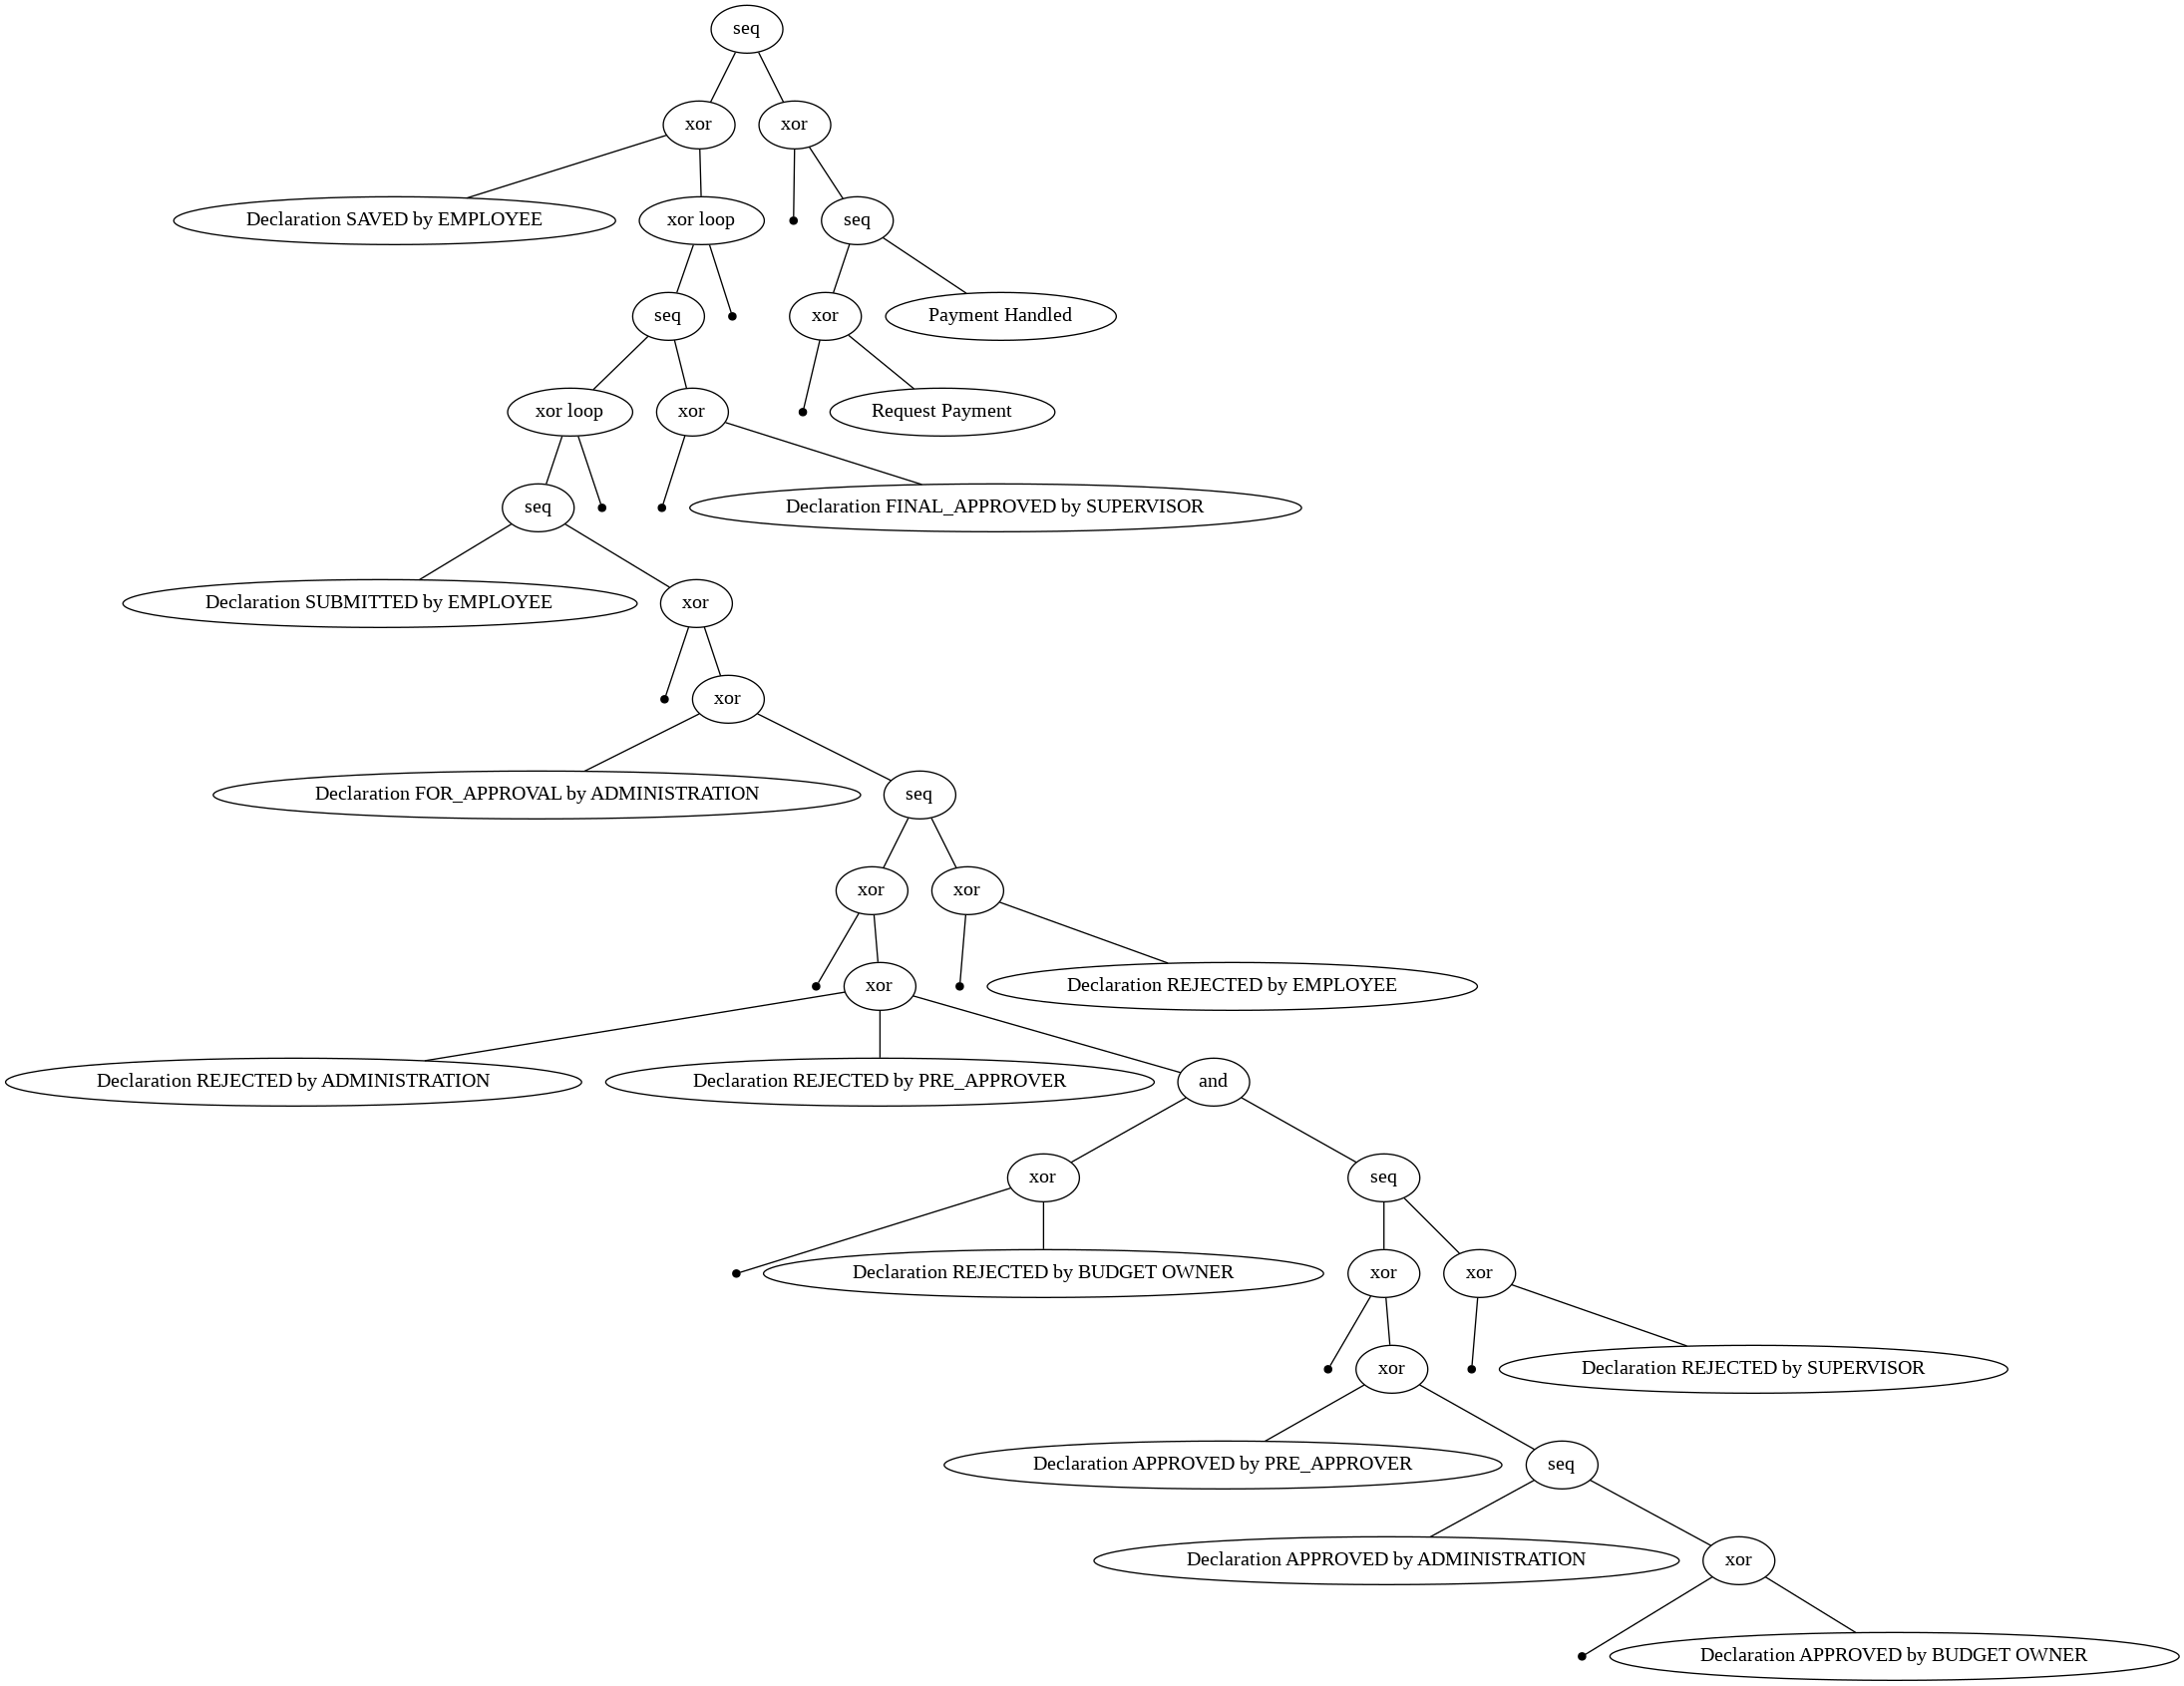

In [155]:
pm4py.view_process_tree(process_tree)

### Standard DFG - Frequency and Performance




<ipython-input-156-81f12aa56ff3>:1: DeprecatedWarning: discover_dfg is deprecated as of 2.3.0 and will be removed in 2.4.0. this method will be replaced by the discover_dfg_typed function(). Please adapt your code to use pm4py.discover_dfg_typed()
  domestic_dfg, dom_s, dom_e = pm4py.discover_dfg(clean_domestic)


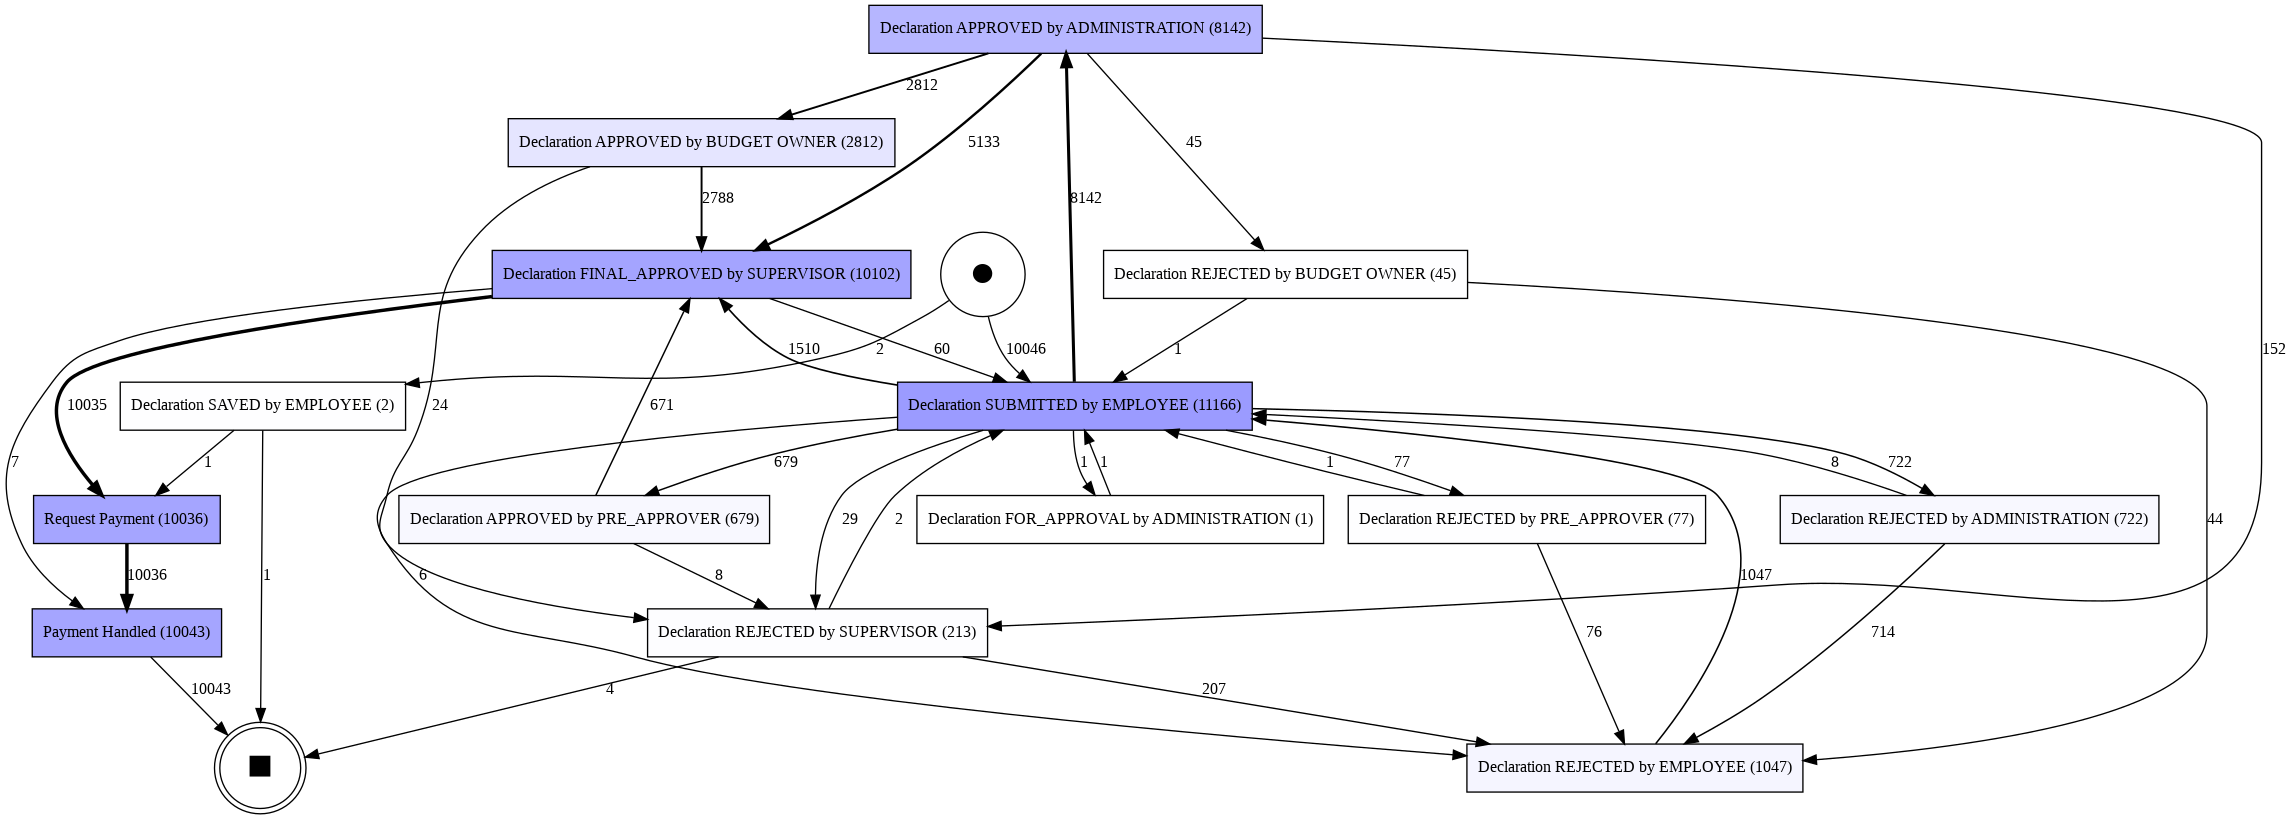

In [156]:
domestic_dfg, dom_s, dom_e = pm4py.discover_dfg(clean_domestic)
pm4py.view_dfg(domestic_dfg, dom_s, dom_e)

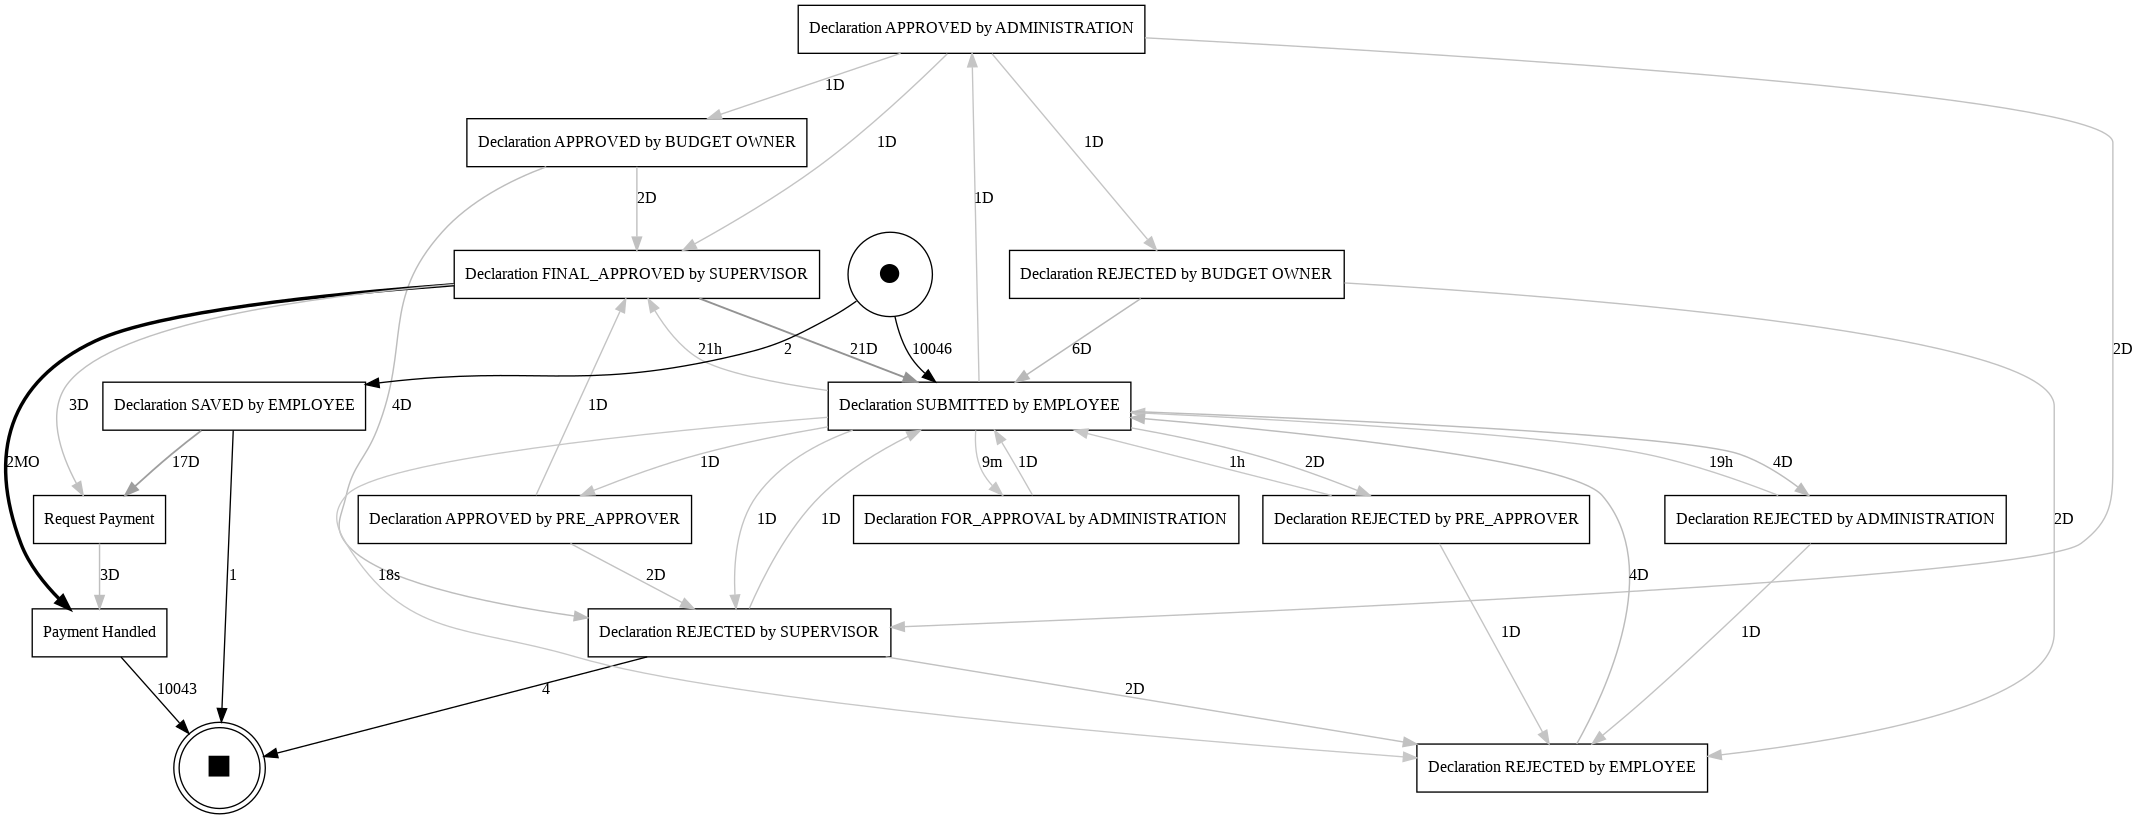

In [157]:
domestic_performance_dfg, dom_s, dom_e = pm4py.discover_performance_dfg(clean_domestic)
pm4py.view_performance_dfg(domestic_performance_dfg, dom_s, dom_e, aggregation_measure="mean")

### Top Domestic Variant DFG - Frequency and Performance





In [158]:
dom_variants = pm4py.get_variants(clean_domestic, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
domestic_variants_amount = len(dom_variants)
print("Number of Domestic Variants: ", domestic_variants_amount)

Number of Domestic Variants:  68


### Top 25% of Variants

In [159]:
print(int(domestic_variants_amount*.25))

17


In [160]:
top_domestic = pm4py.filter_variants_top_k(clean_domestic, int(domestic_variants_amount*.25), activity_key='concept:name', timestamp_key='time:timestamp', case_id_key='case:concept:name')

<ipython-input-161-a98906ed72c1>:1: DeprecatedWarning: discover_dfg is deprecated as of 2.3.0 and will be removed in 2.4.0. this method will be replaced by the discover_dfg_typed function(). Please adapt your code to use pm4py.discover_dfg_typed()
  domestic_dfg, dom_s, dom_e = pm4py.discover_dfg(top_domestic)
/usr/local/lib/python3.8/dist-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


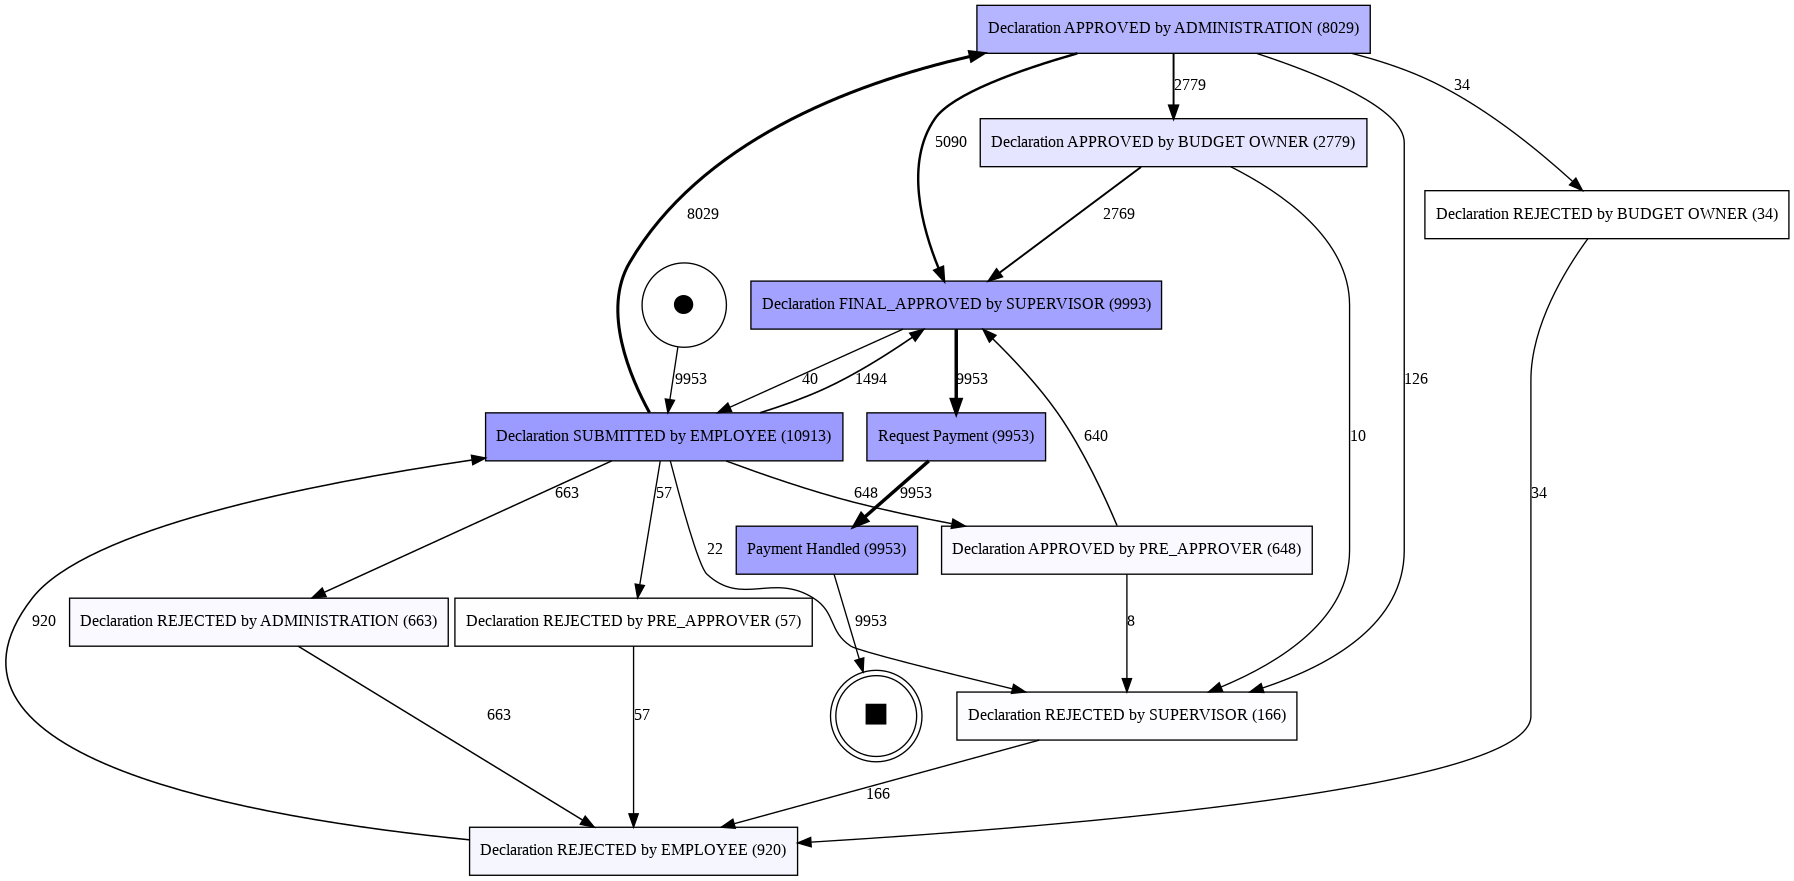

In [161]:
domestic_dfg, dom_s, dom_e = pm4py.discover_dfg(top_domestic)
pm4py.view_dfg(domestic_dfg, dom_s, dom_e)

/usr/local/lib/python3.8/dist-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


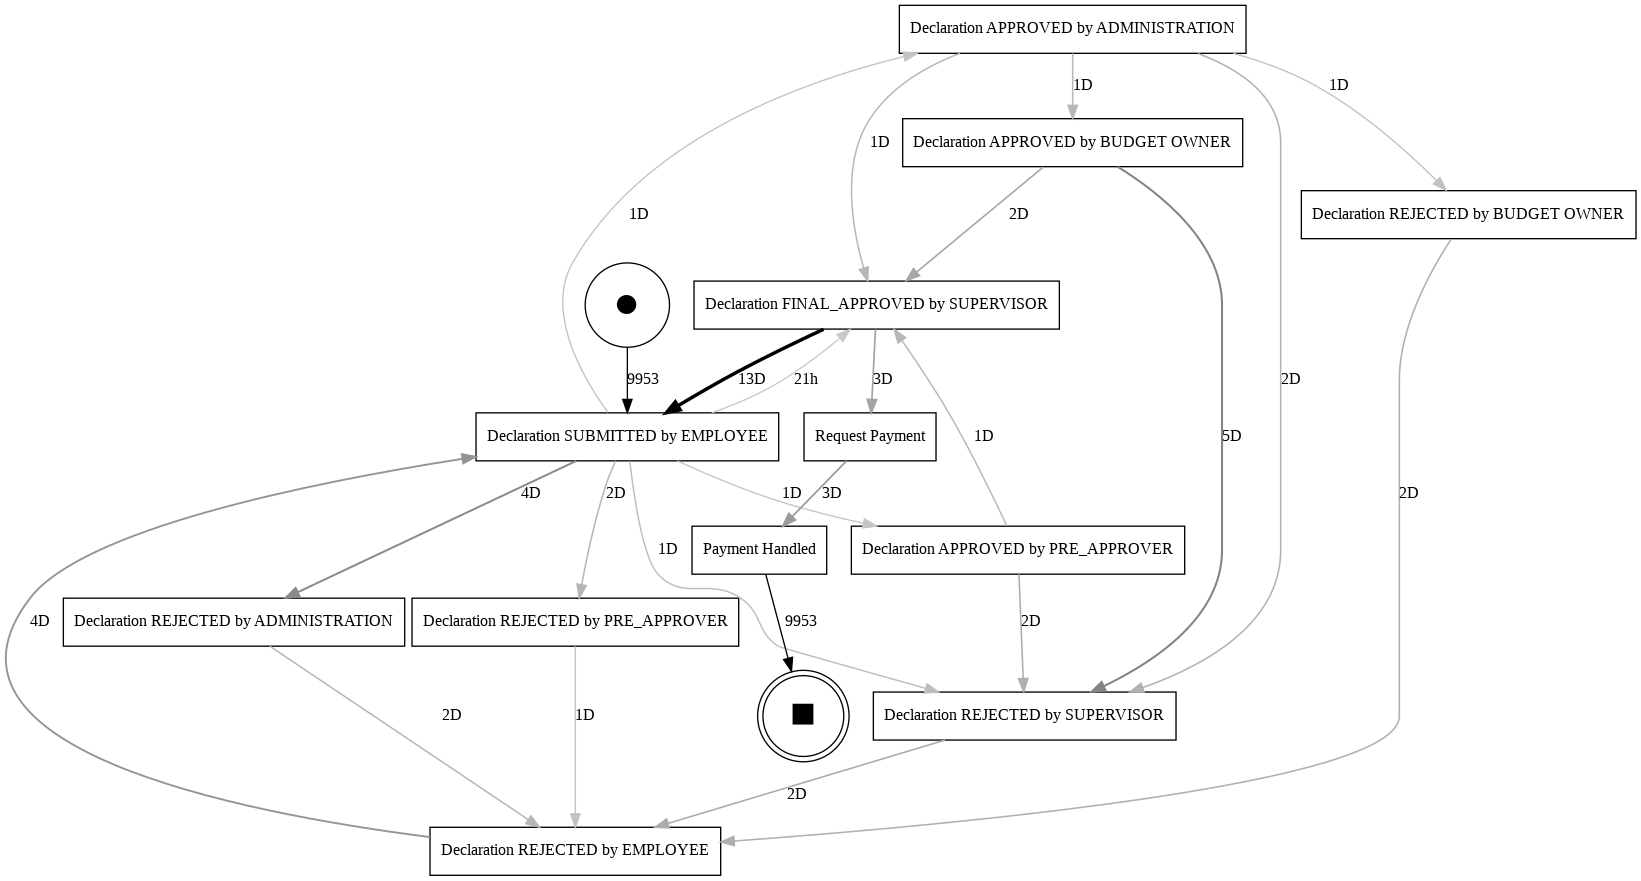

In [162]:
domestic_performance_dfg, dom_s, dom_e = pm4py.discover_performance_dfg(top_domestic)
pm4py.view_performance_dfg(domestic_performance_dfg, dom_s, dom_e, aggregation_measure="mean")

### Top 15% of Variants

In [163]:
print(int(domestic_variants_amount*.15))

10


In [164]:
top_domestic = pm4py.filter_variants_top_k(clean_domestic, int(domestic_variants_amount*.15), activity_key='concept:name', timestamp_key='time:timestamp', case_id_key='case:concept:name')

<ipython-input-165-a98906ed72c1>:1: DeprecatedWarning: discover_dfg is deprecated as of 2.3.0 and will be removed in 2.4.0. this method will be replaced by the discover_dfg_typed function(). Please adapt your code to use pm4py.discover_dfg_typed()
  domestic_dfg, dom_s, dom_e = pm4py.discover_dfg(top_domestic)
/usr/local/lib/python3.8/dist-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


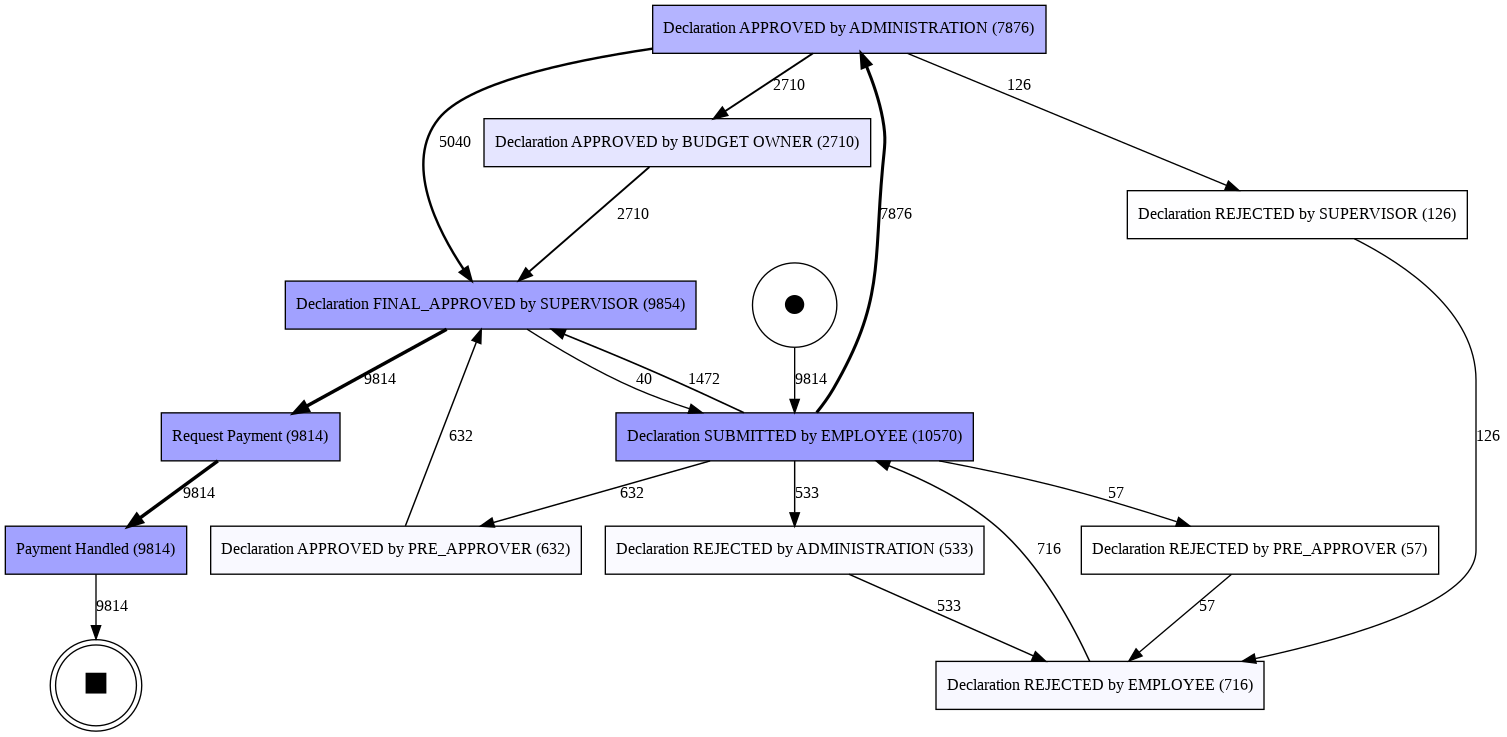

In [165]:
domestic_dfg, dom_s, dom_e = pm4py.discover_dfg(top_domestic)
pm4py.view_dfg(domestic_dfg, dom_s, dom_e)

/usr/local/lib/python3.8/dist-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


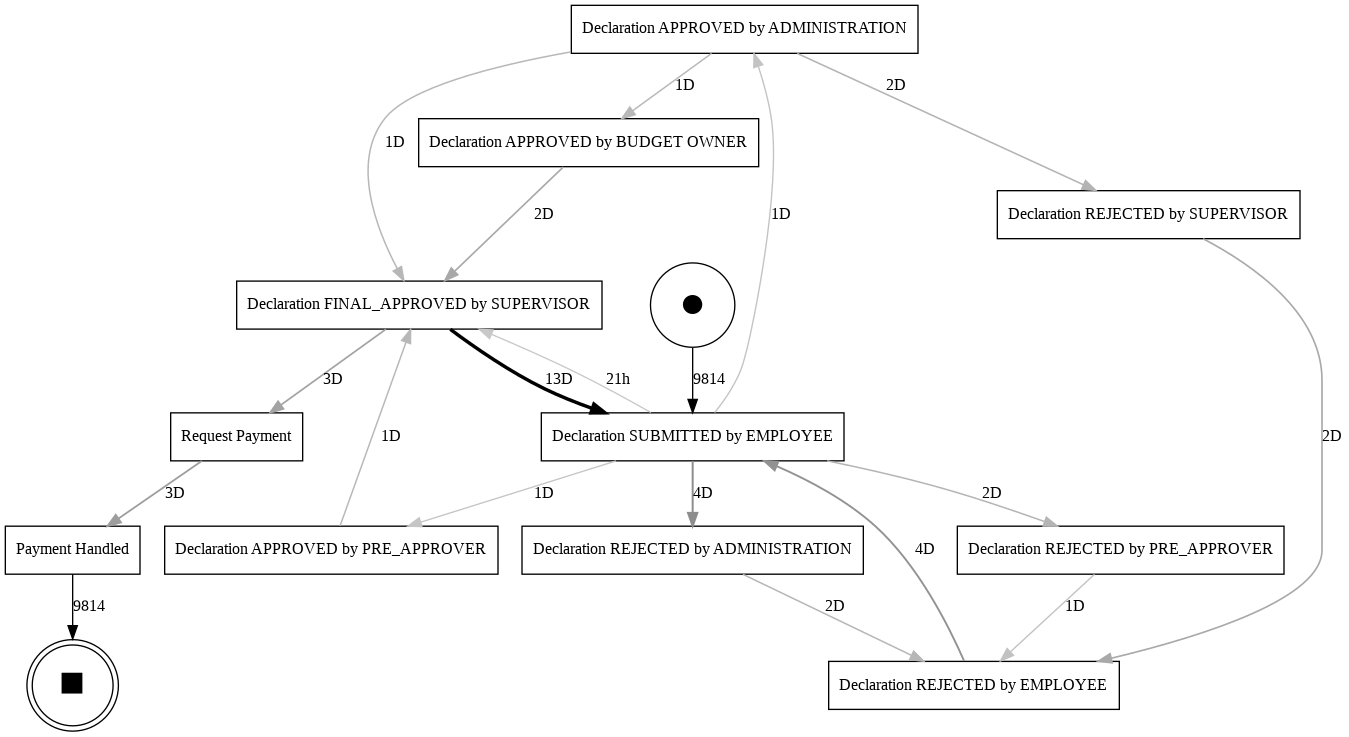

In [166]:
domestic_performance_dfg, dom_s, dom_e = pm4py.discover_performance_dfg(top_domestic)
pm4py.view_performance_dfg(domestic_performance_dfg, dom_s, dom_e, aggregation_measure="mean")

## International Visualization

### International Process Tree

In [167]:
process_tree_int = pm4py.discover_process_tree_inductive(clean_international)

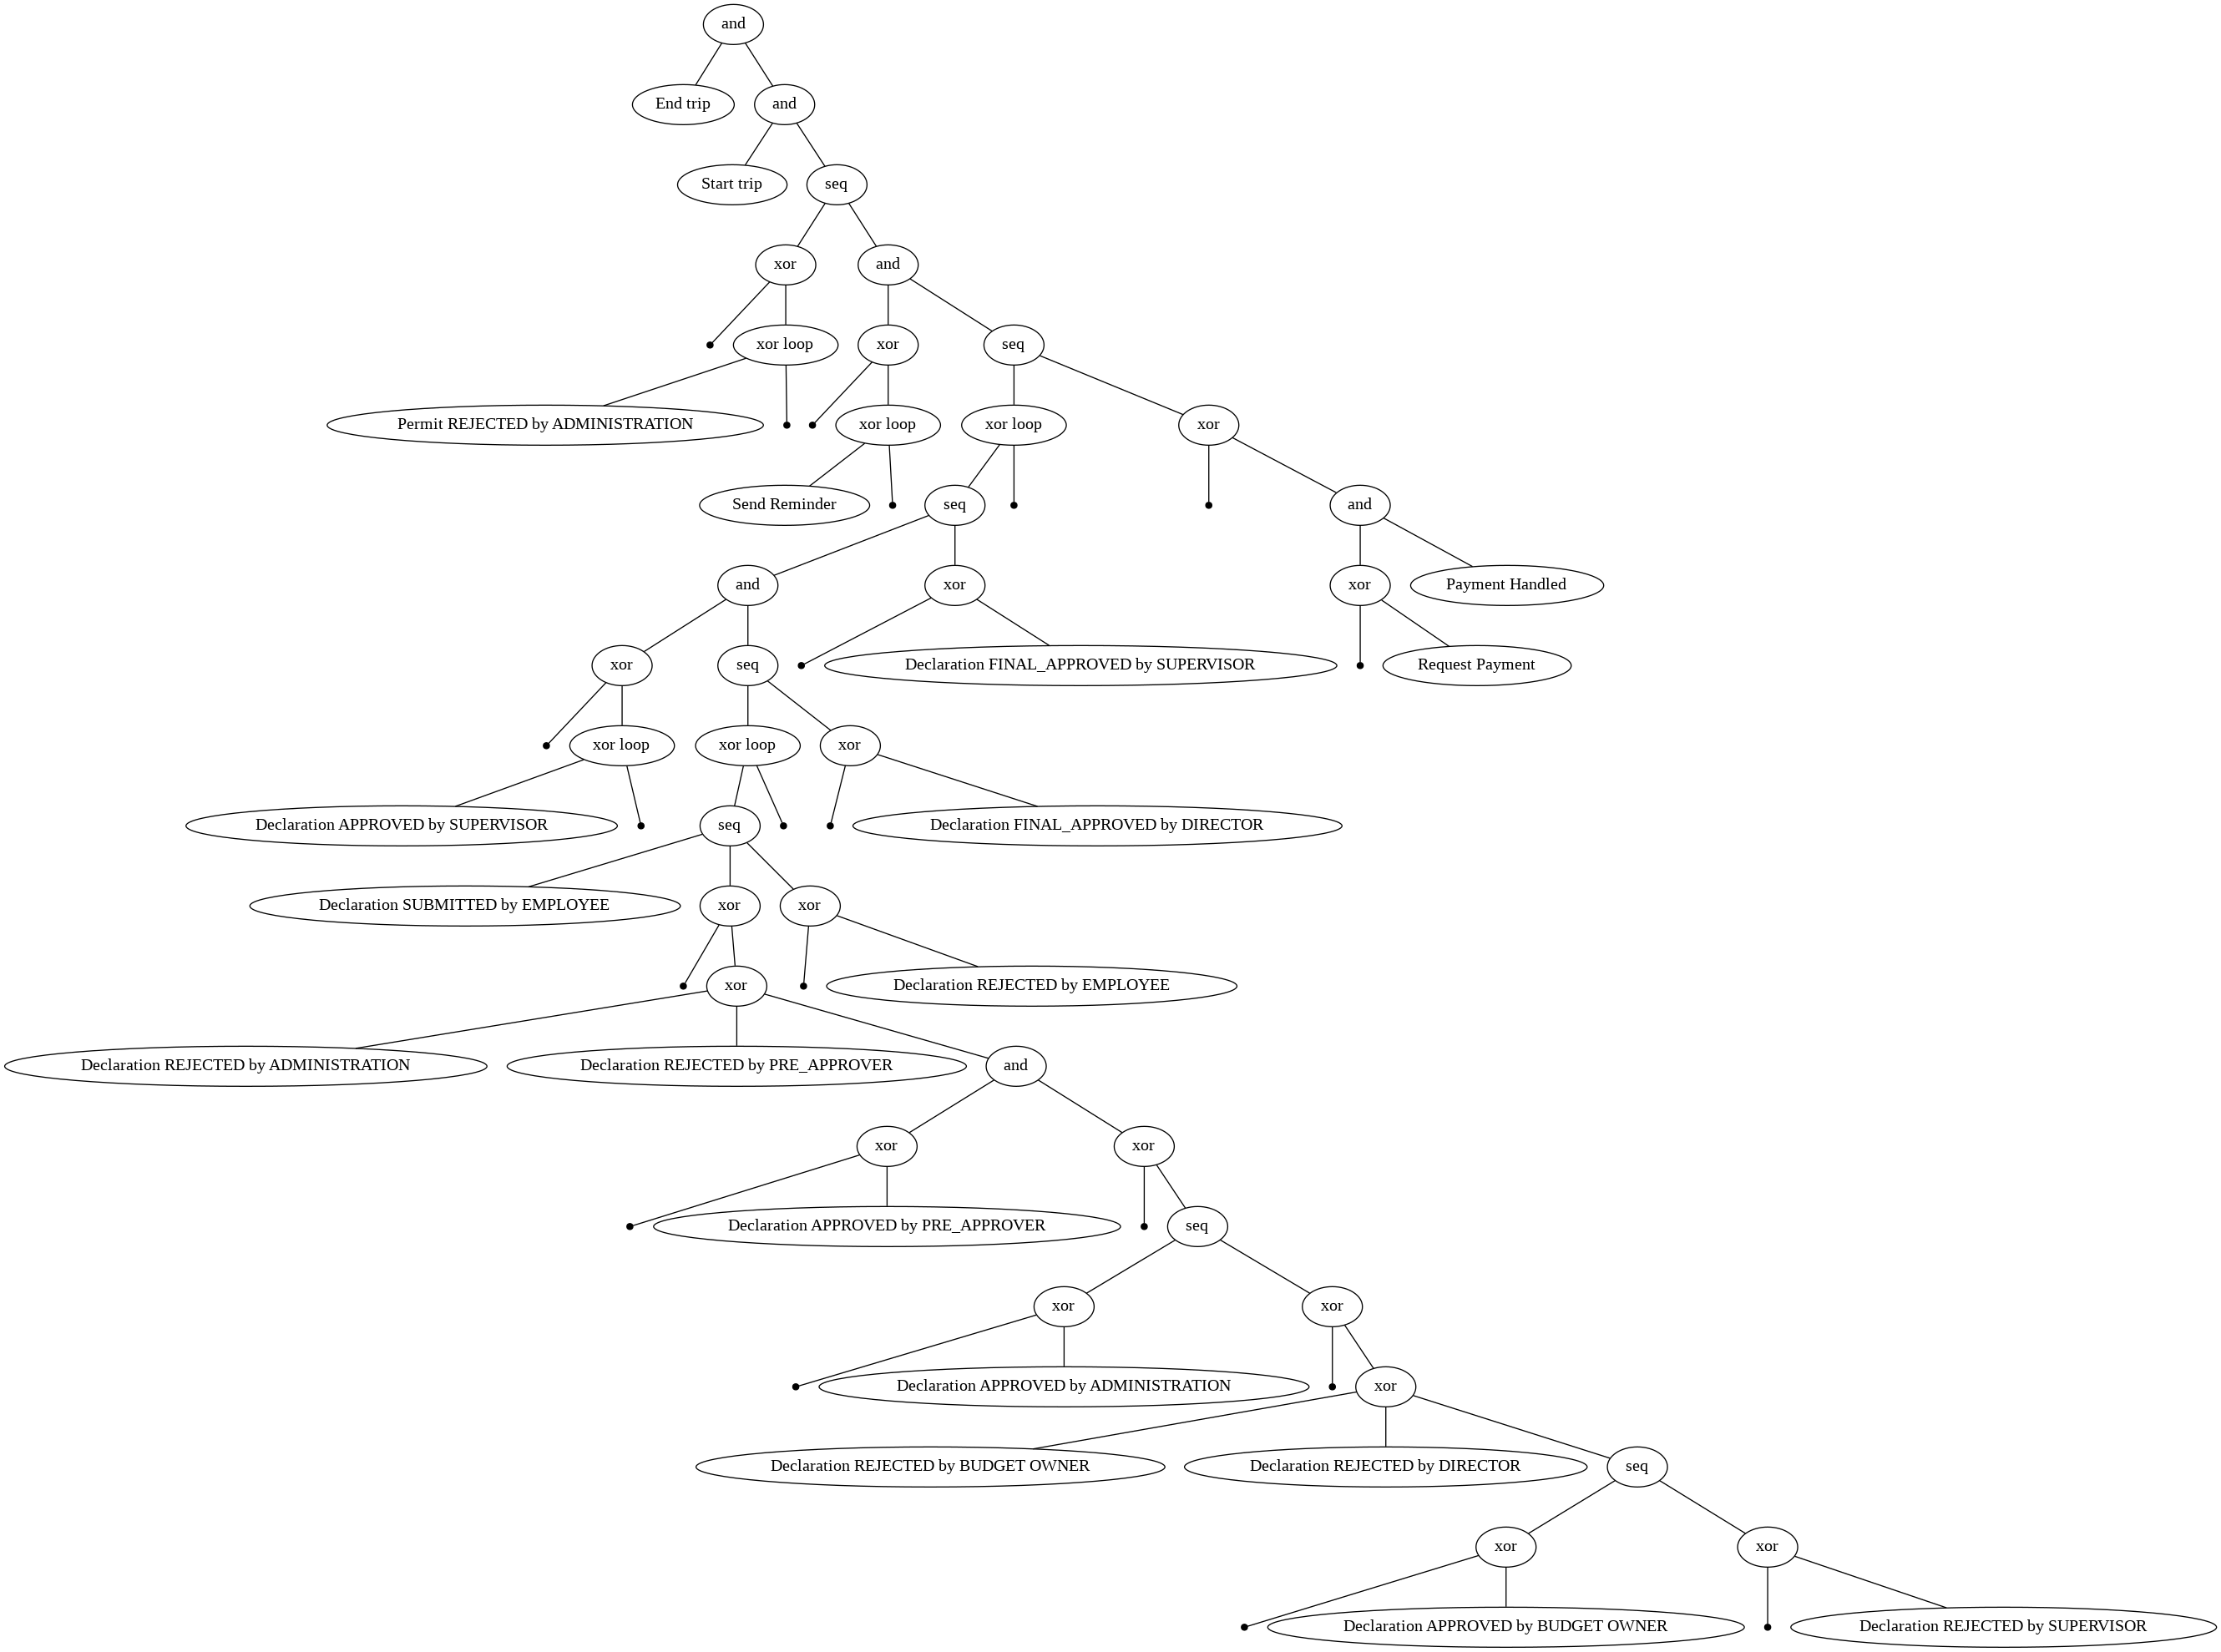

In [168]:
pm4py.view_process_tree(process_tree_int)

### Standard DFG - Frequency and Performance


<ipython-input-169-9fdebde148d2>:1: DeprecatedWarning: discover_dfg is deprecated as of 2.3.0 and will be removed in 2.4.0. this method will be replaced by the discover_dfg_typed function(). Please adapt your code to use pm4py.discover_dfg_typed()
  int_dfg, int_s, int_e = pm4py.discover_dfg(clean_international)


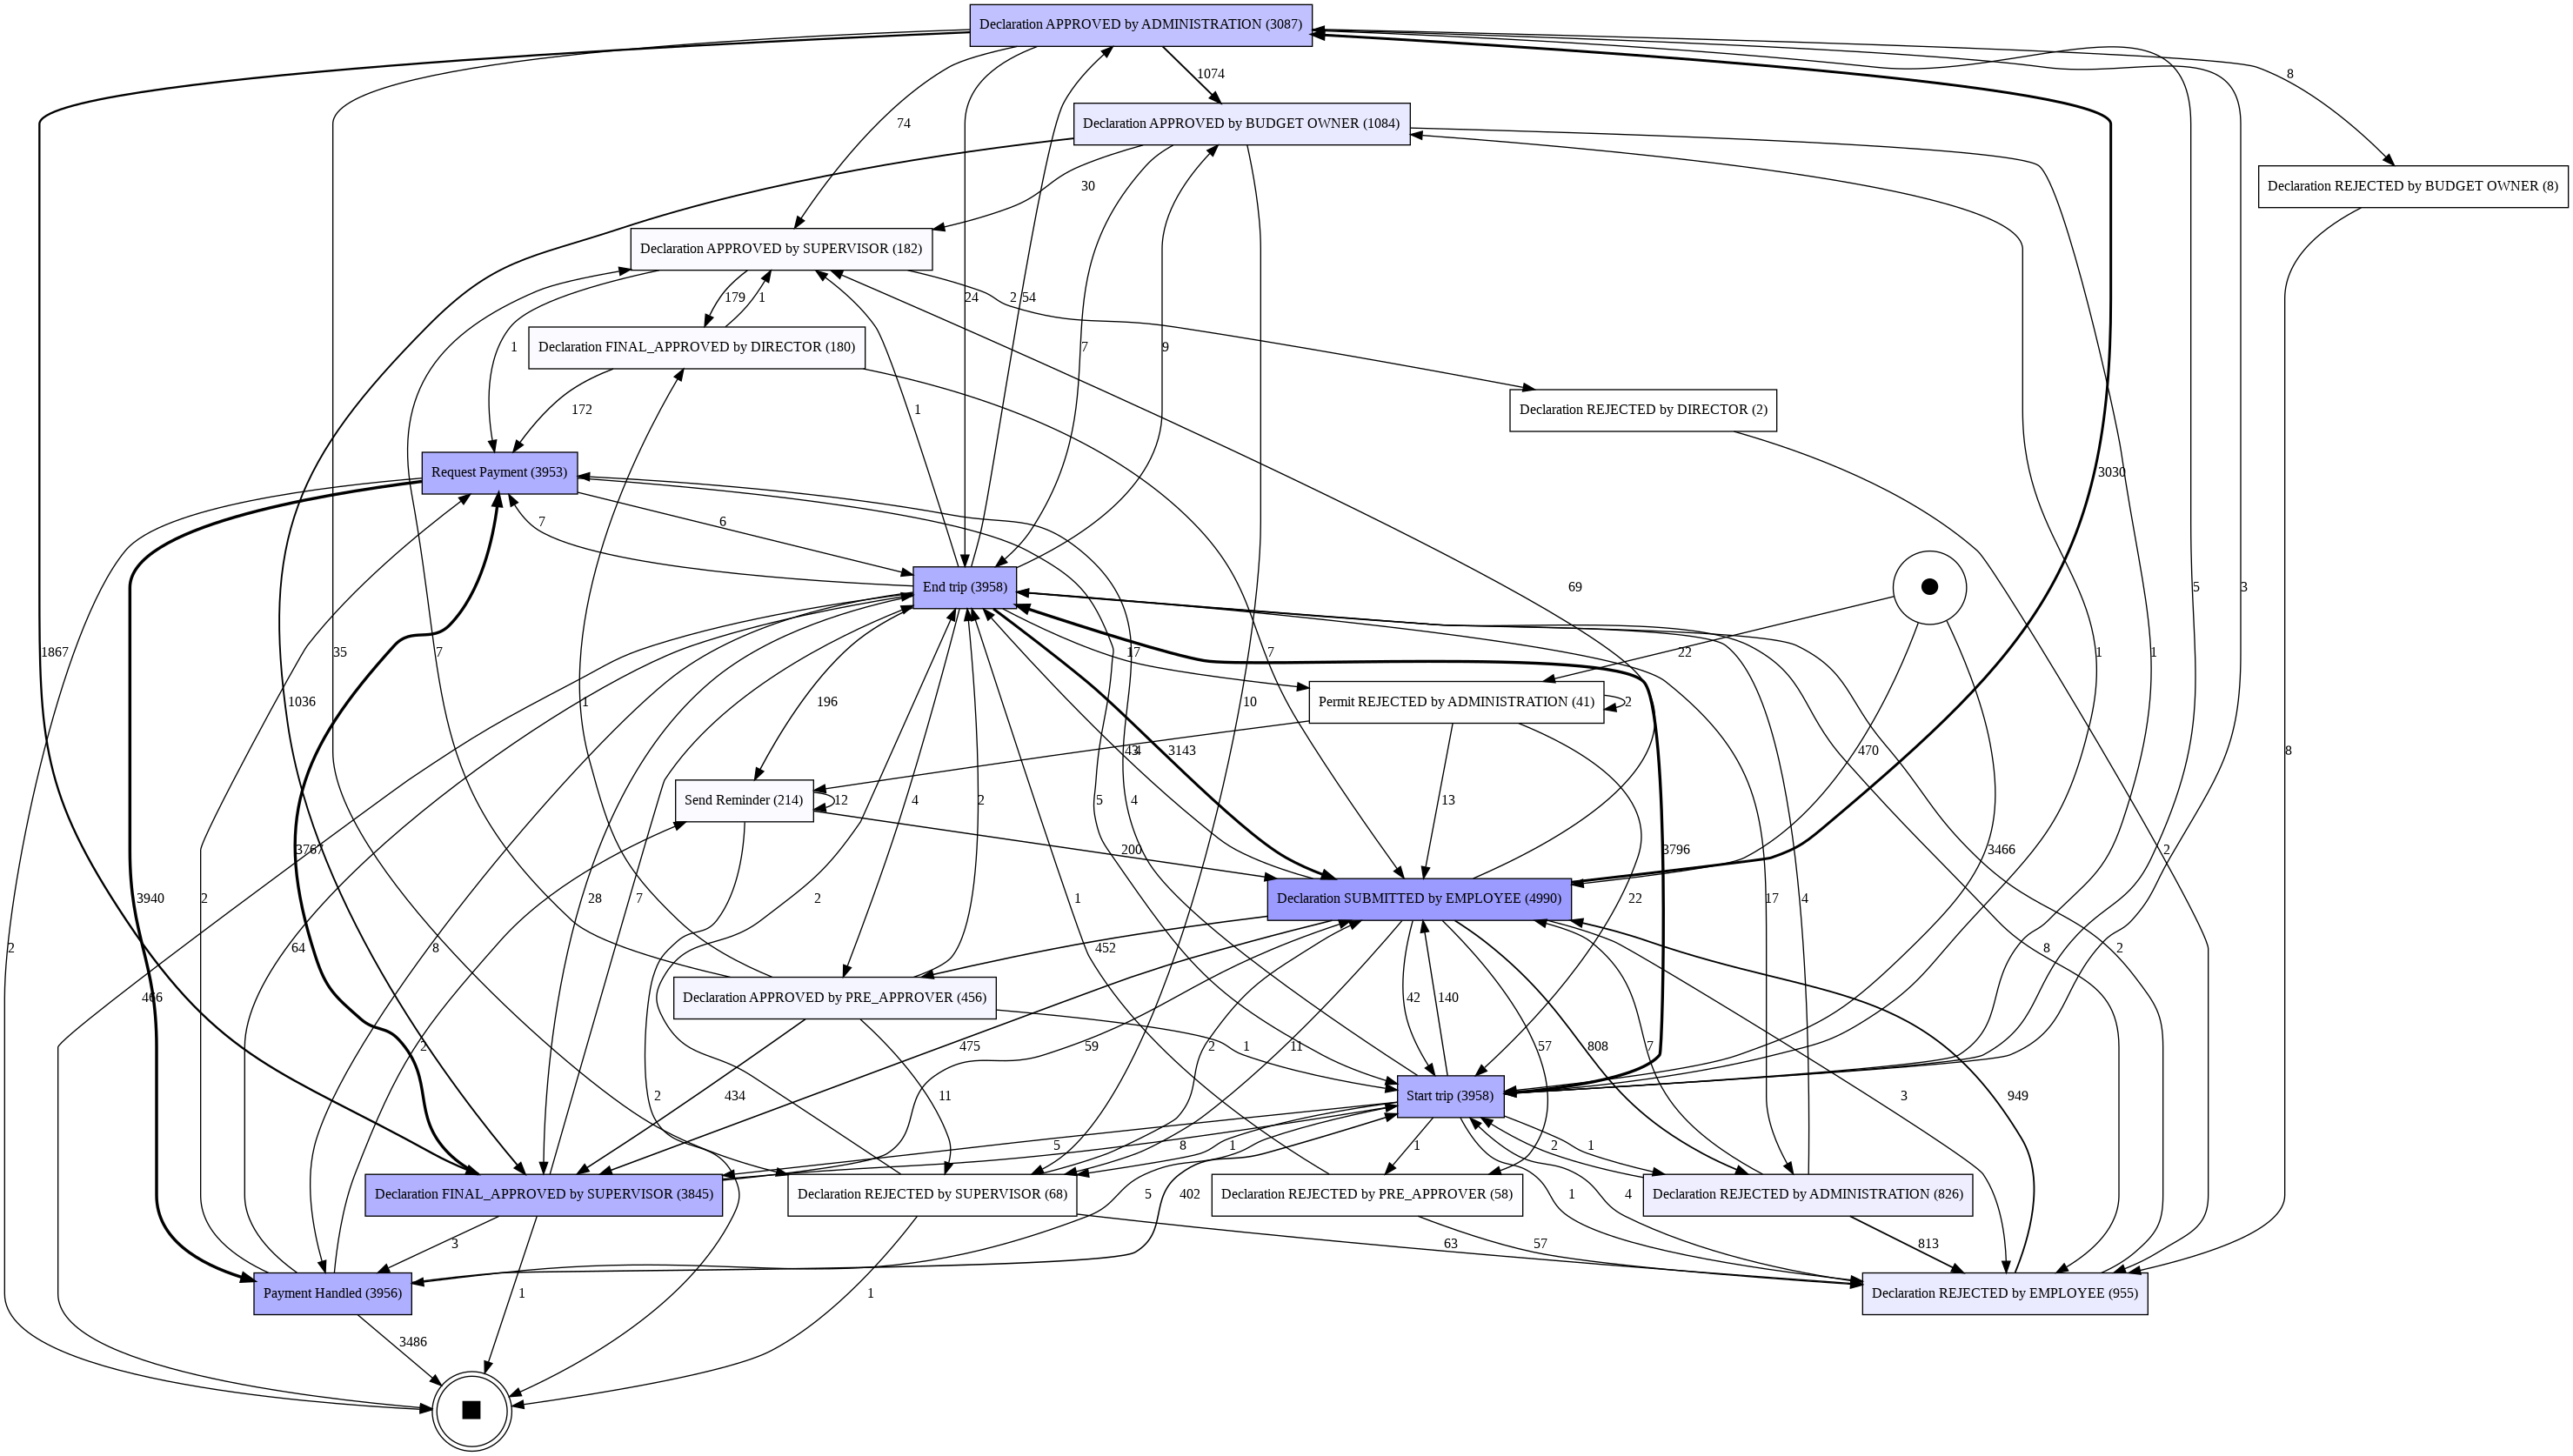

In [169]:
int_dfg, int_s, int_e = pm4py.discover_dfg(clean_international)
pm4py.view_dfg(int_dfg, int_s, int_e)

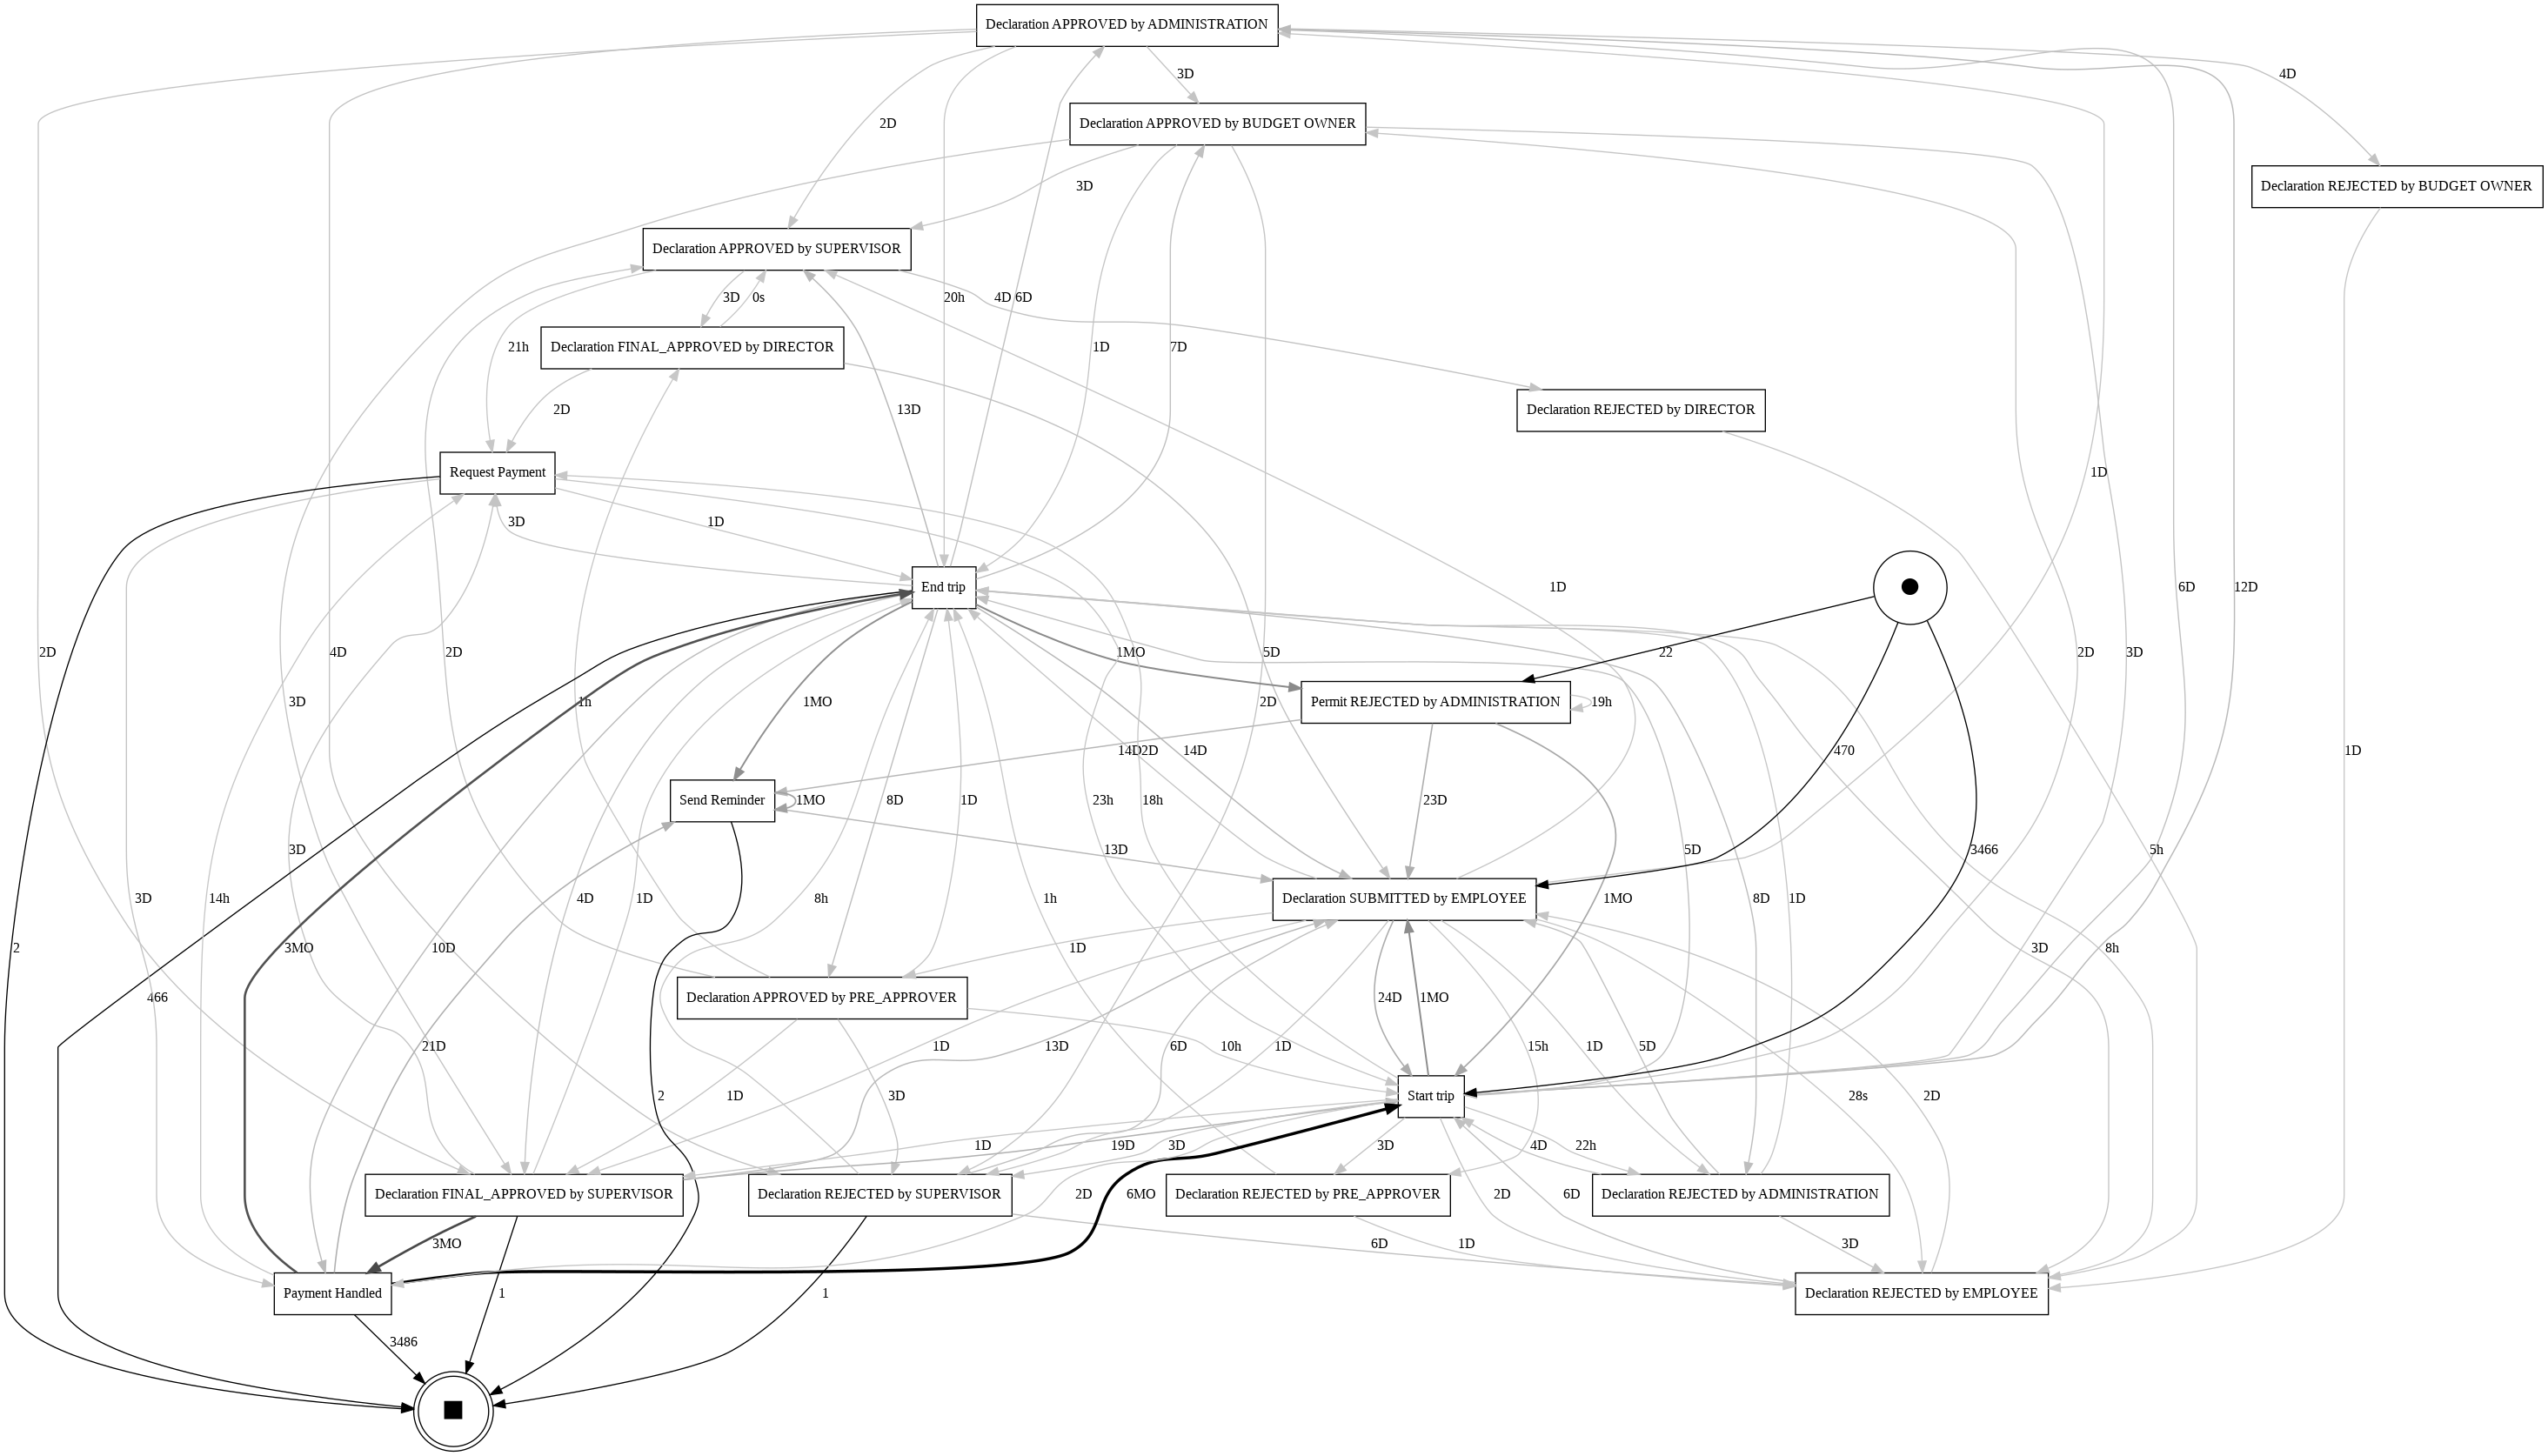

In [170]:
domestic_performance_dfg, int_perf_s, int_perf_e = pm4py.discover_performance_dfg(clean_international)
pm4py.view_performance_dfg(domestic_performance_dfg, int_perf_s, int_perf_e, aggregation_measure="mean")

### Top International Variant DFG - Frequency and Performance


In [171]:
int_variants = pm4py.get_variants(clean_international, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
international_variant_amount = len(int_variants)
print("Number of International Variants: ", international_variant_amount)

Number of International Variants:  194


#### Top 25% of Variants

In [172]:
print(int(international_variant_amount*.25))

48


In [173]:
top_international = pm4py.filter_variants_top_k(clean_international, int(international_variant_amount*.25), activity_key='concept:name', timestamp_key='time:timestamp', case_id_key='case:concept:name')

<ipython-input-174-bf2b83e2a54d>:1: DeprecatedWarning: discover_dfg is deprecated as of 2.3.0 and will be removed in 2.4.0. this method will be replaced by the discover_dfg_typed function(). Please adapt your code to use pm4py.discover_dfg_typed()
  international_freq_dfg, inter_freq_s, inter_freq_e = pm4py.discover_dfg(top_international)
/usr/local/lib/python3.8/dist-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


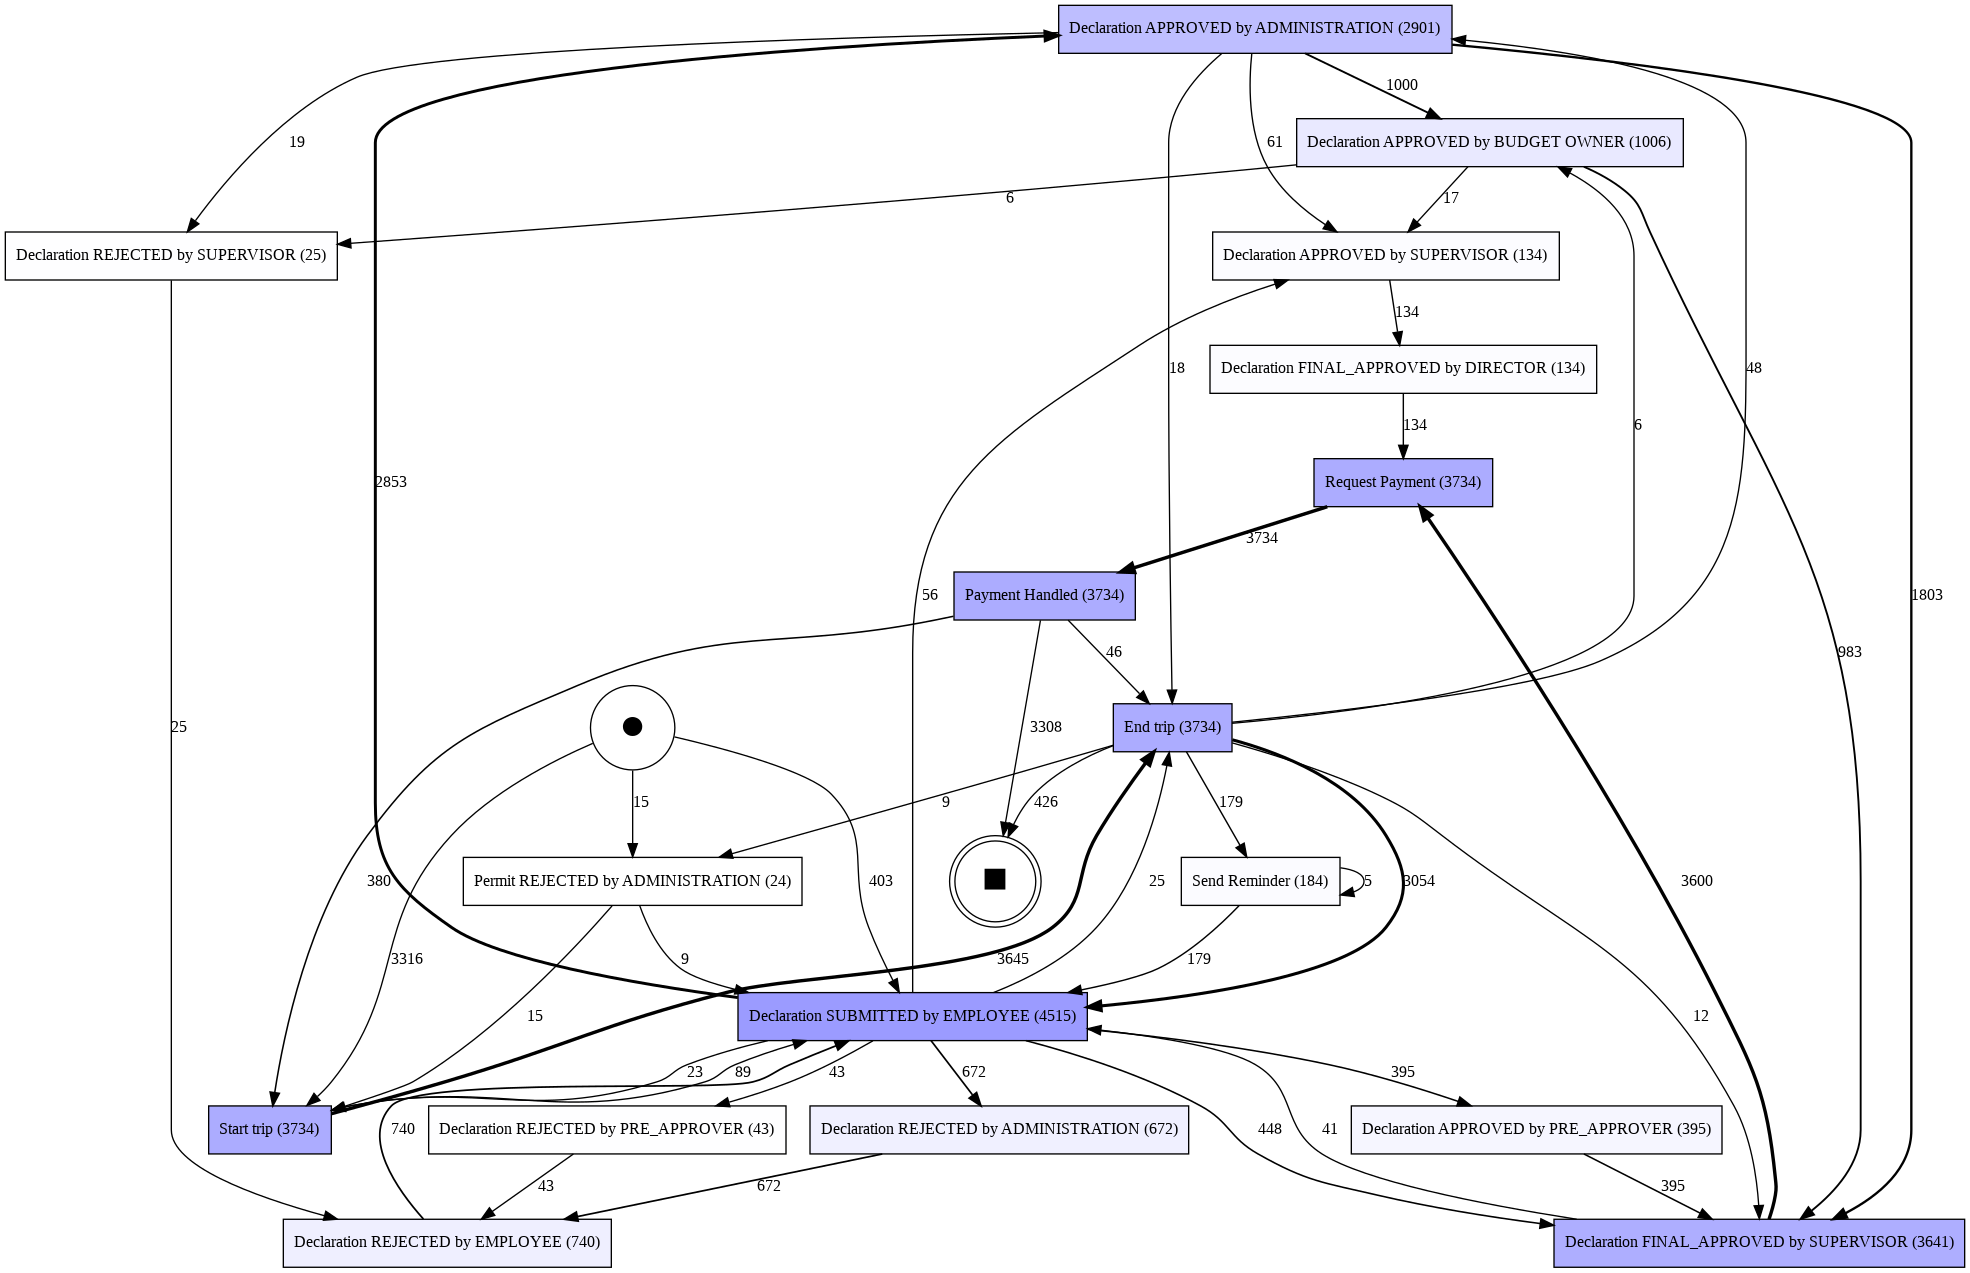

In [174]:
international_freq_dfg, inter_freq_s, inter_freq_e = pm4py.discover_dfg(top_international)
pm4py.view_dfg(international_freq_dfg, inter_freq_s, inter_freq_e)

/usr/local/lib/python3.8/dist-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


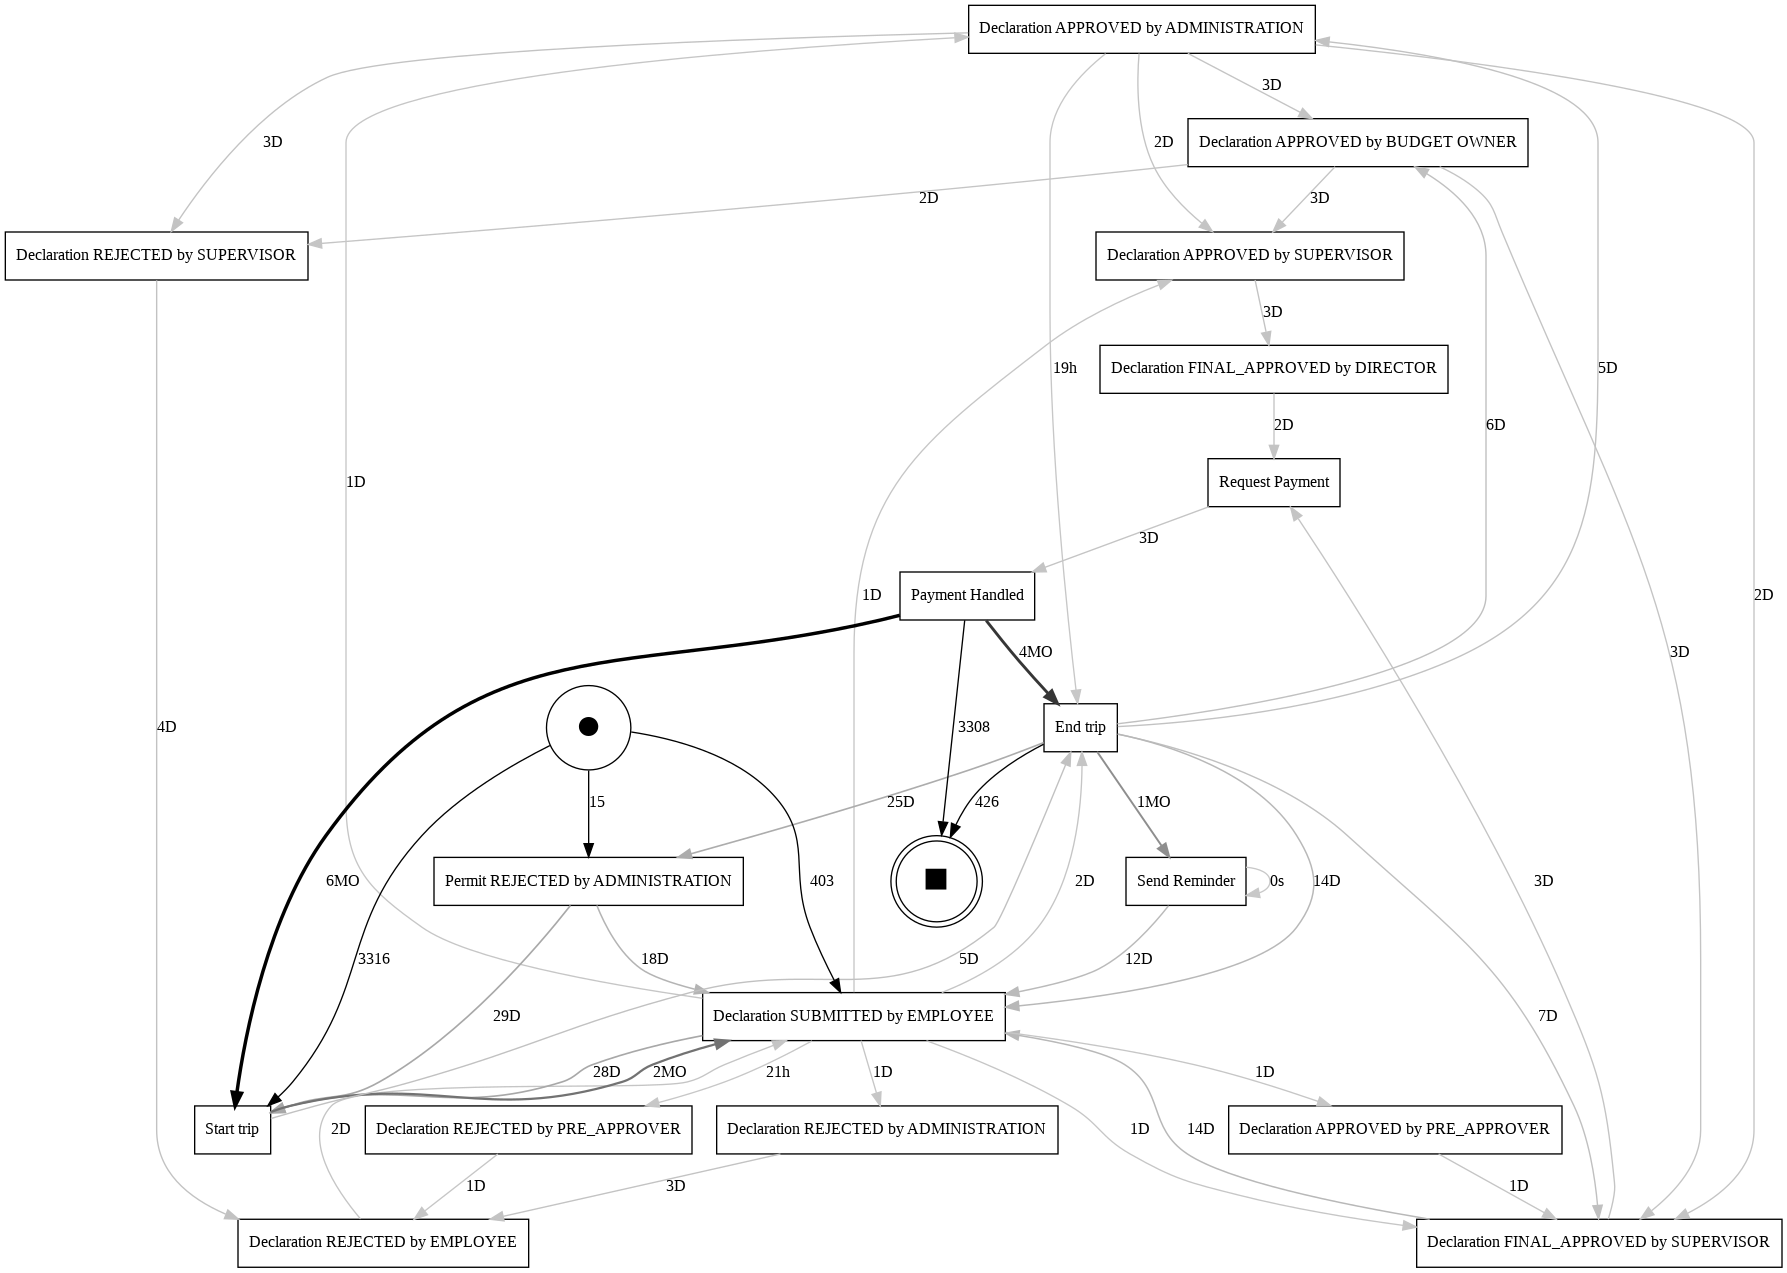

In [175]:
international_perf_dfg, inter_perf_s, inter_perf_e = pm4py.discover_performance_dfg(top_international)
pm4py.view_performance_dfg(international_perf_dfg, inter_perf_s, inter_perf_e, aggregation_measure="mean")

#### Top 15% of Variants

In [176]:
print(int(international_variant_amount*.15))

29


In [177]:
top_international = pm4py.filter_variants_top_k(clean_international, int(international_variant_amount*.15), activity_key='concept:name', timestamp_key='time:timestamp', case_id_key='case:concept:name')

<ipython-input-178-bf2b83e2a54d>:1: DeprecatedWarning: discover_dfg is deprecated as of 2.3.0 and will be removed in 2.4.0. this method will be replaced by the discover_dfg_typed function(). Please adapt your code to use pm4py.discover_dfg_typed()
  international_freq_dfg, inter_freq_s, inter_freq_e = pm4py.discover_dfg(top_international)
/usr/local/lib/python3.8/dist-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


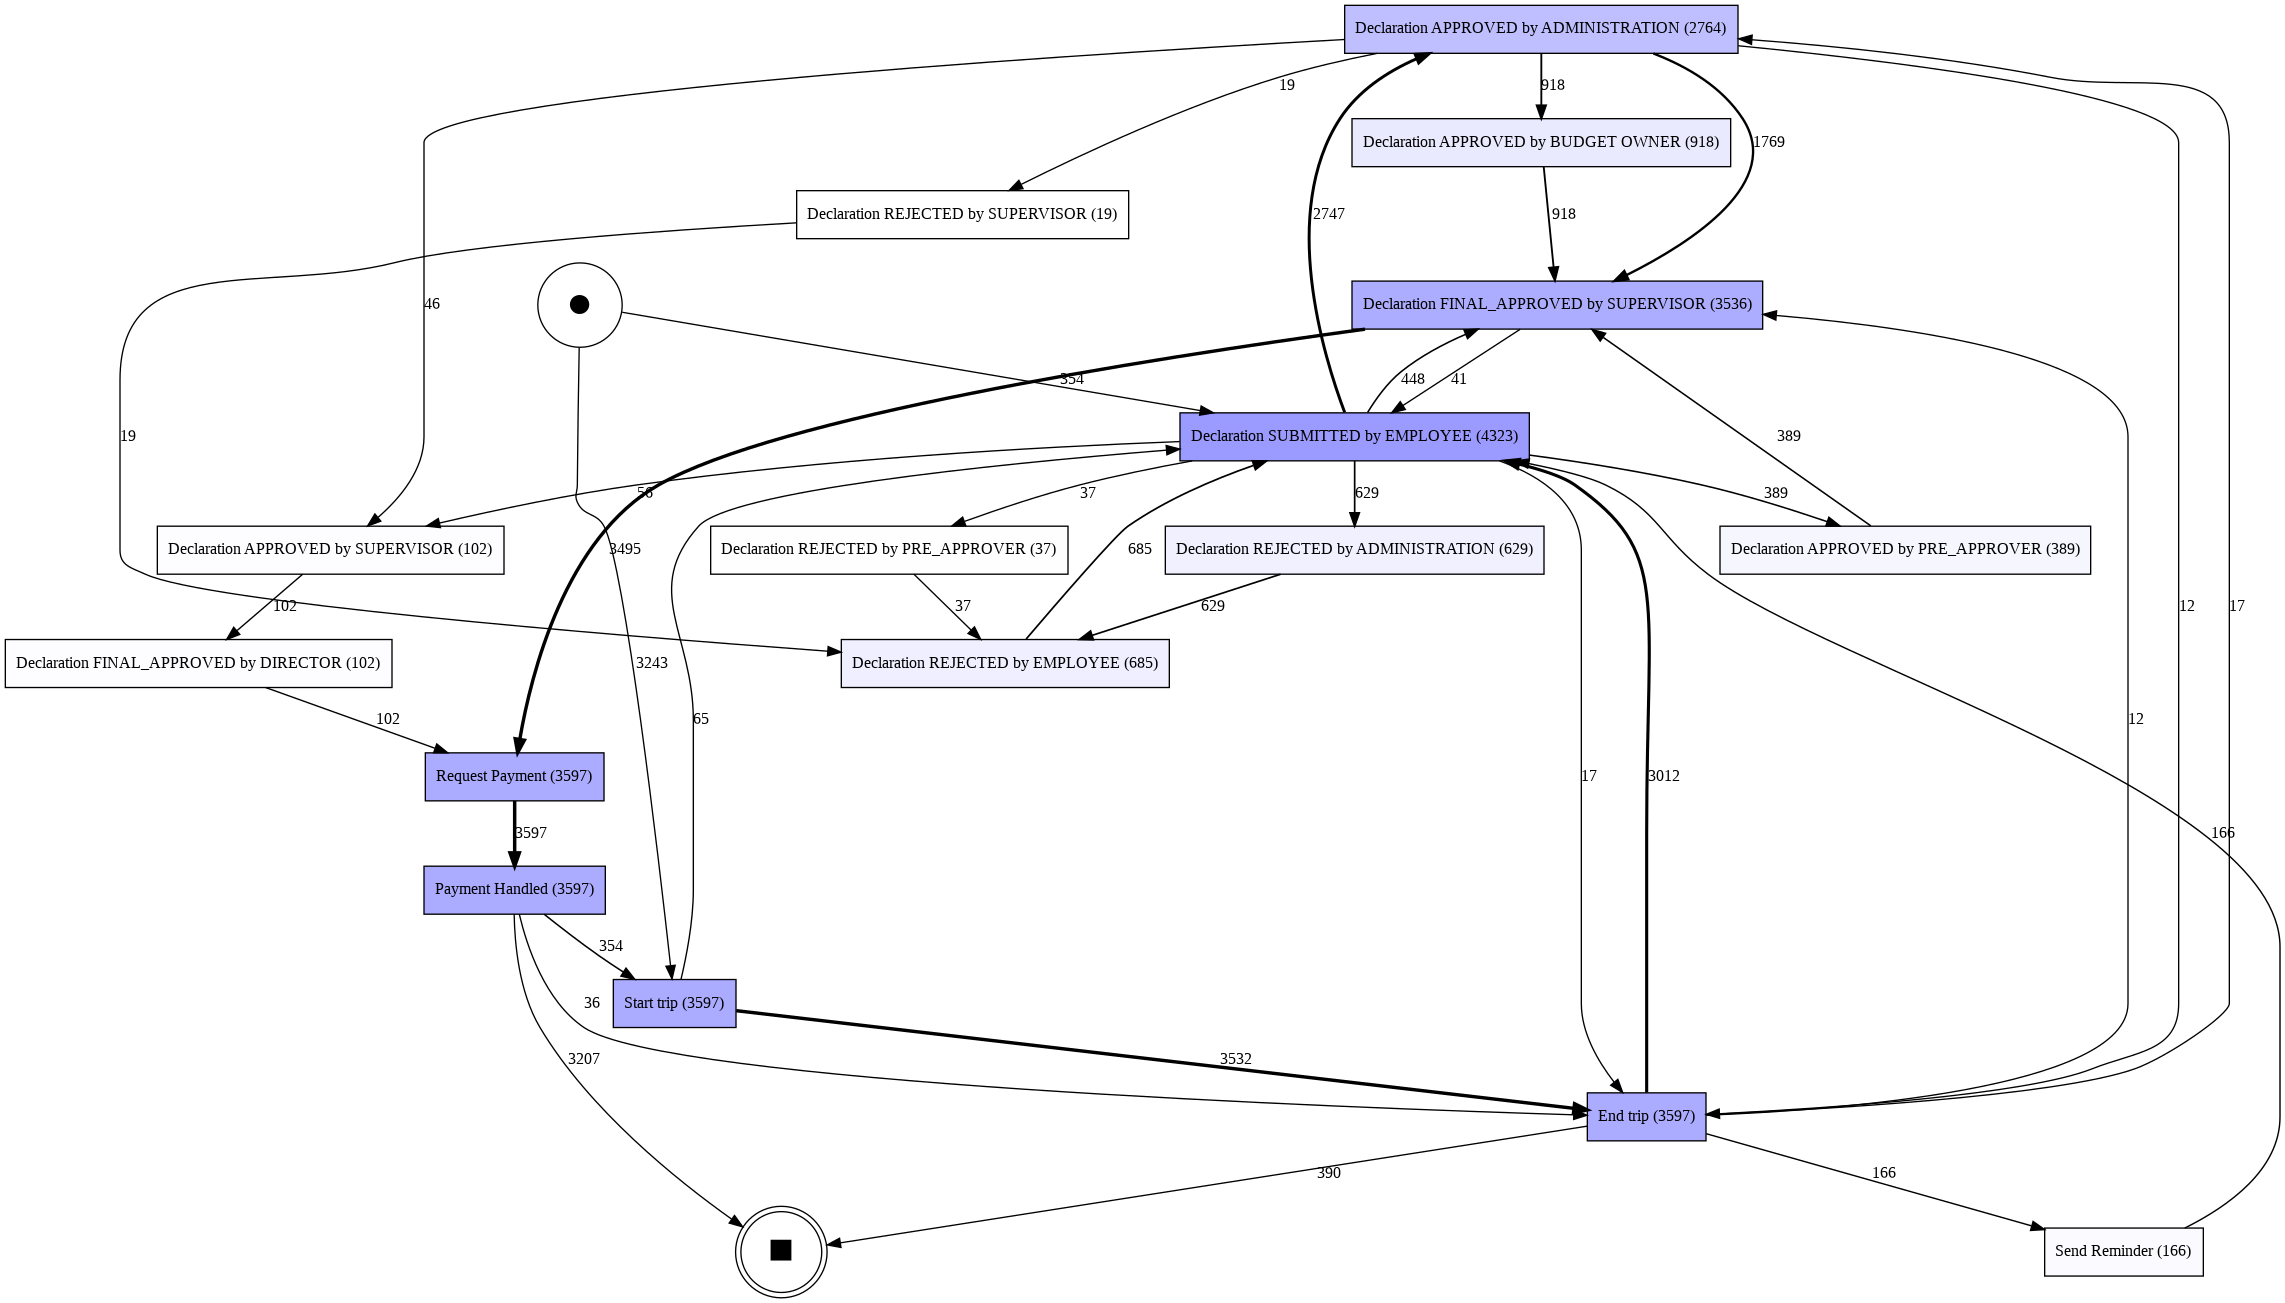

In [178]:
international_freq_dfg, inter_freq_s, inter_freq_e = pm4py.discover_dfg(top_international)
pm4py.view_dfg(international_freq_dfg, inter_freq_s, inter_freq_e)

/usr/local/lib/python3.8/dist-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


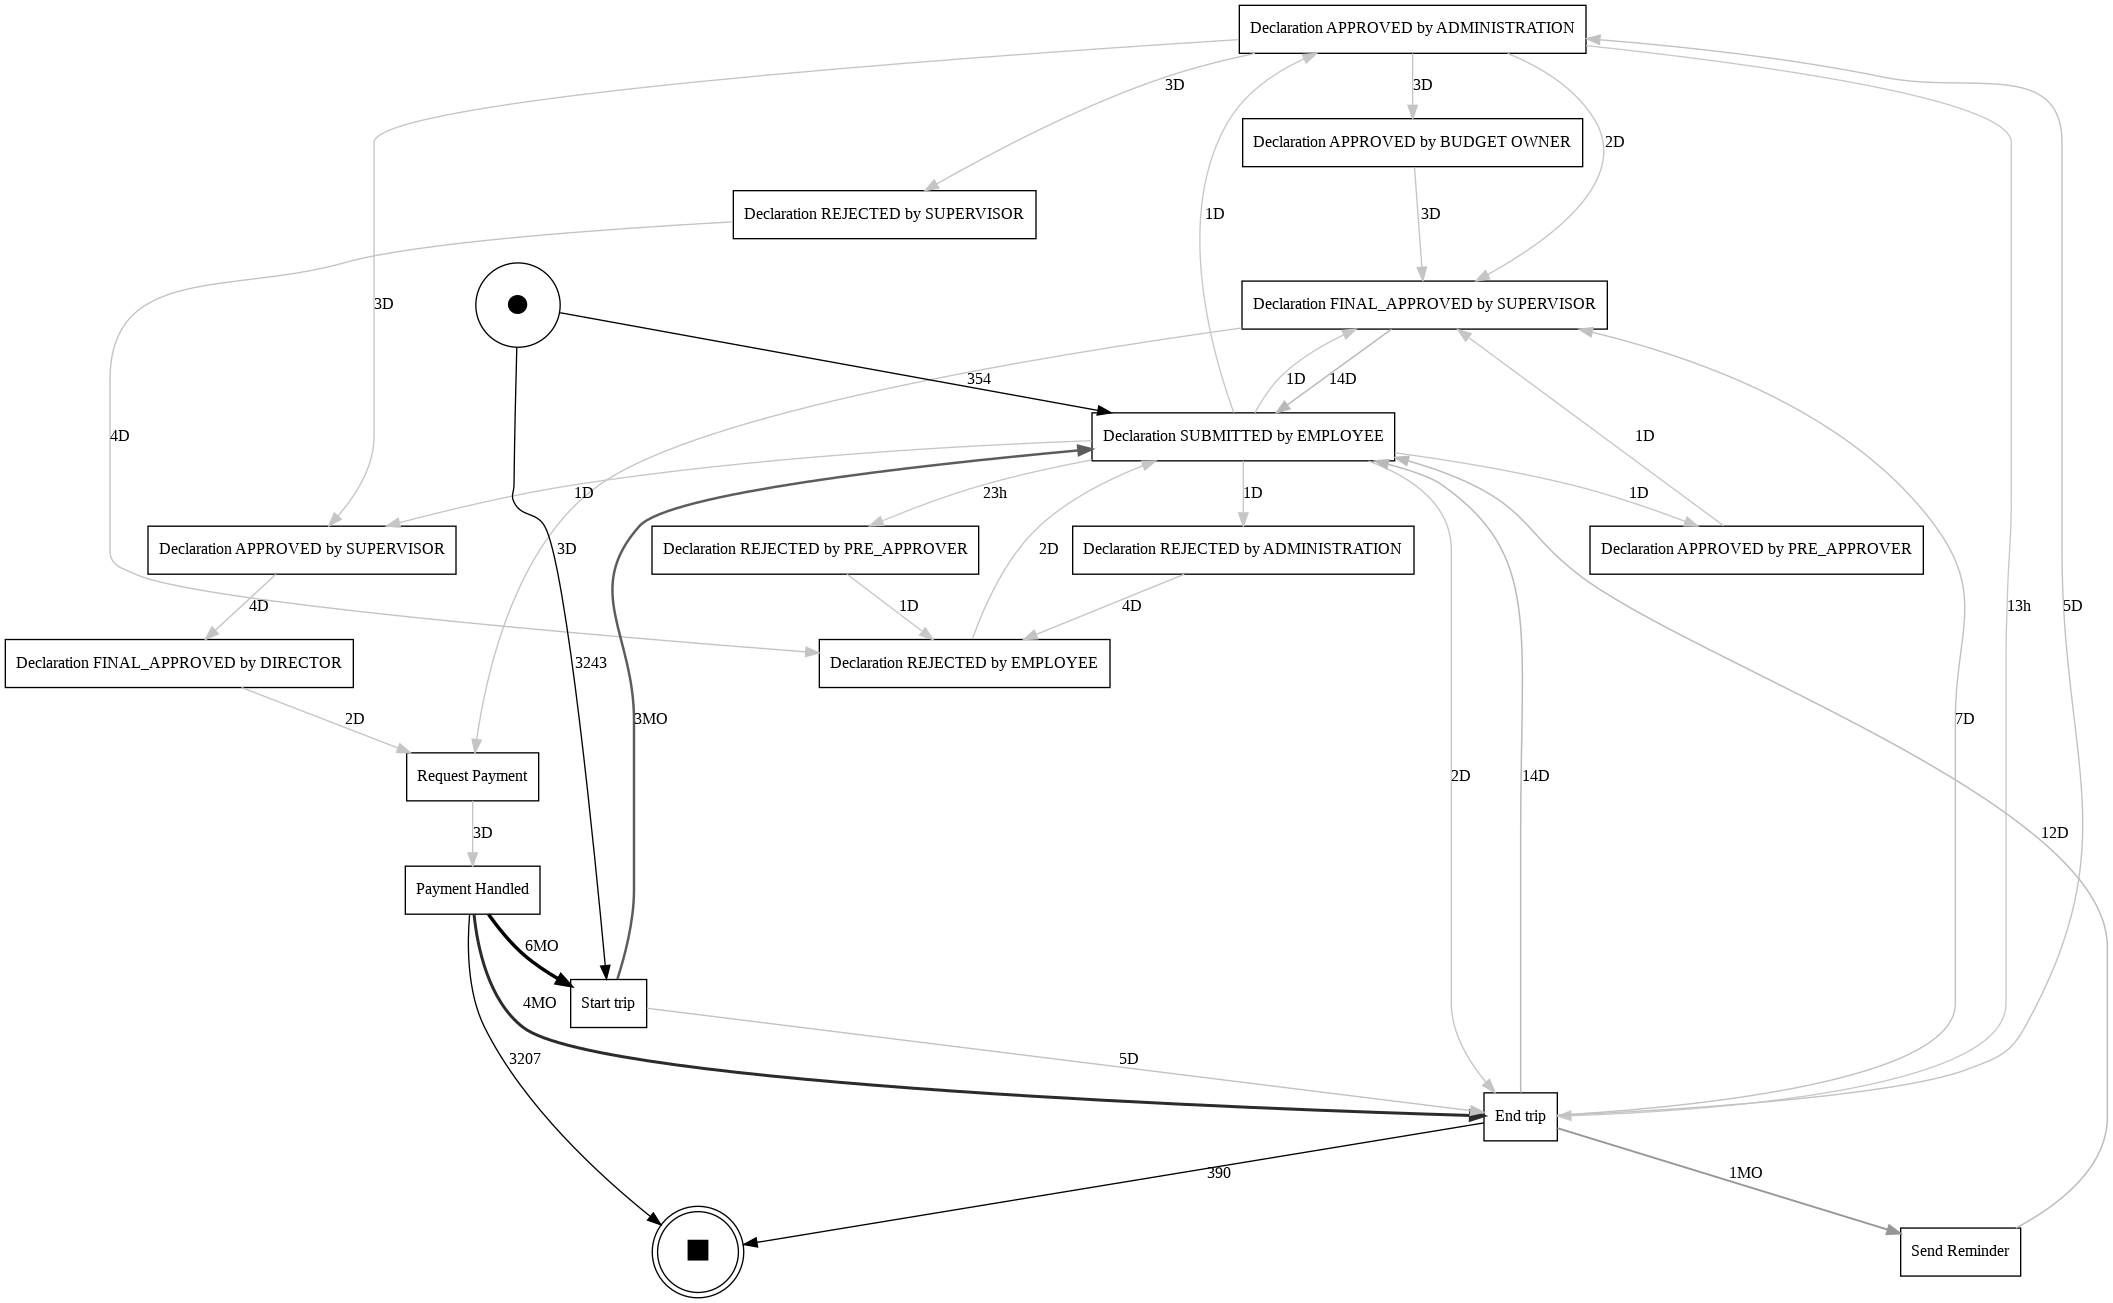

In [179]:
international_perf_dfg, inter_perf_s, inter_perf_e = pm4py.discover_performance_dfg(top_international)
pm4py.view_performance_dfg(international_perf_dfg, inter_perf_s, inter_perf_e, aggregation_measure="mean")

### International Inductive Petri Net

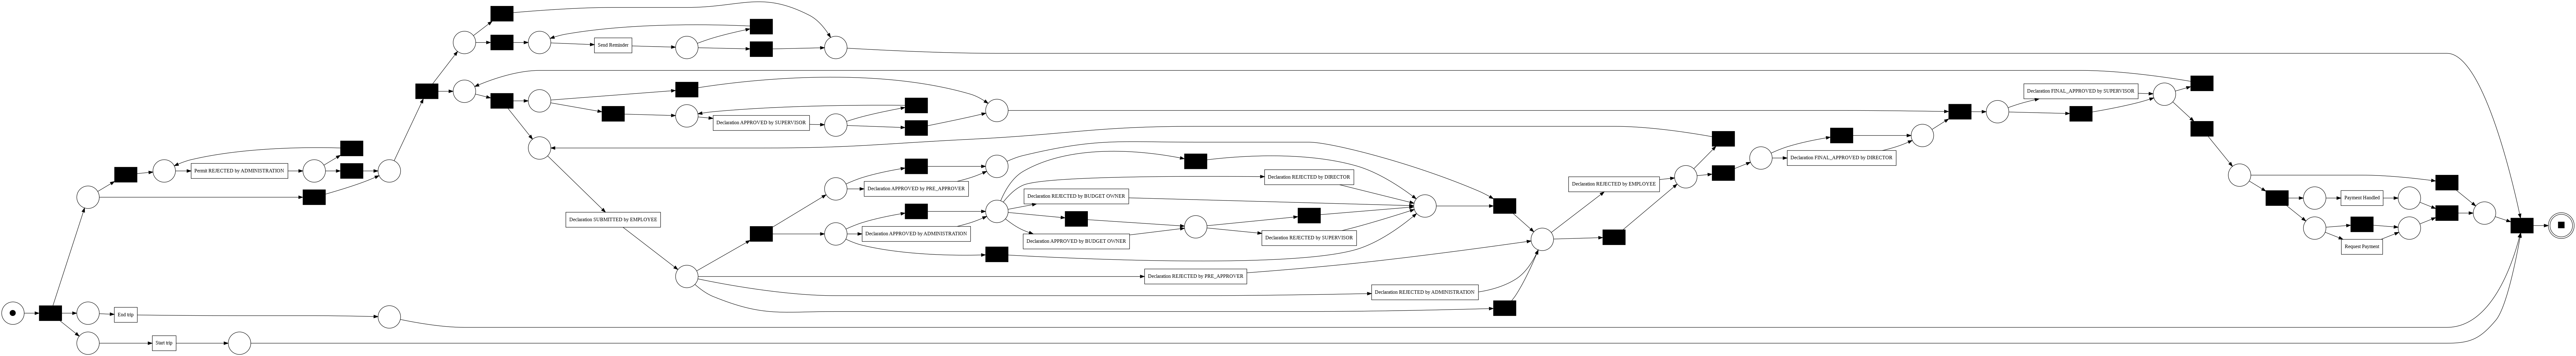

In [180]:
inductive_int_net, inductive_int_im, inductive_int_fm = pm4py.discover_petri_net_inductive(clean_international, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(inductive_int_net, inductive_int_im, inductive_int_fm, format='png')

### International Heuristic Petri Net - Frequency and Performance Visualization

replaying log with TBR, completed variants ::   0%|          | 0/194 [00:00<?, ?it/s]

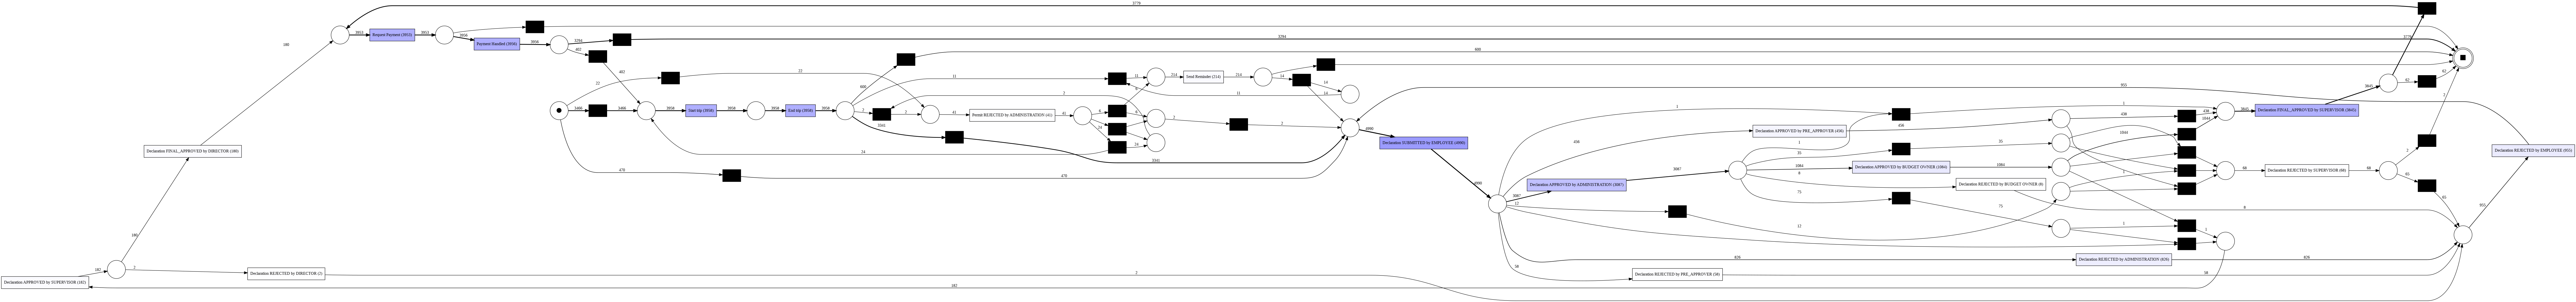

In [181]:
heu_dnet,heu_dim, hue_dfm = pm4py.discover_petri_net_heuristics(clean_international, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
gviz = pn_visualizer.apply(heu_dnet,heu_dim, hue_dfm, variant=pn_visualizer.Variants.FREQUENCY, log=clean_international)
pn_visualizer.view(gviz)

replaying log with TBR, completed variants ::   0%|          | 0/194 [00:00<?, ?it/s]

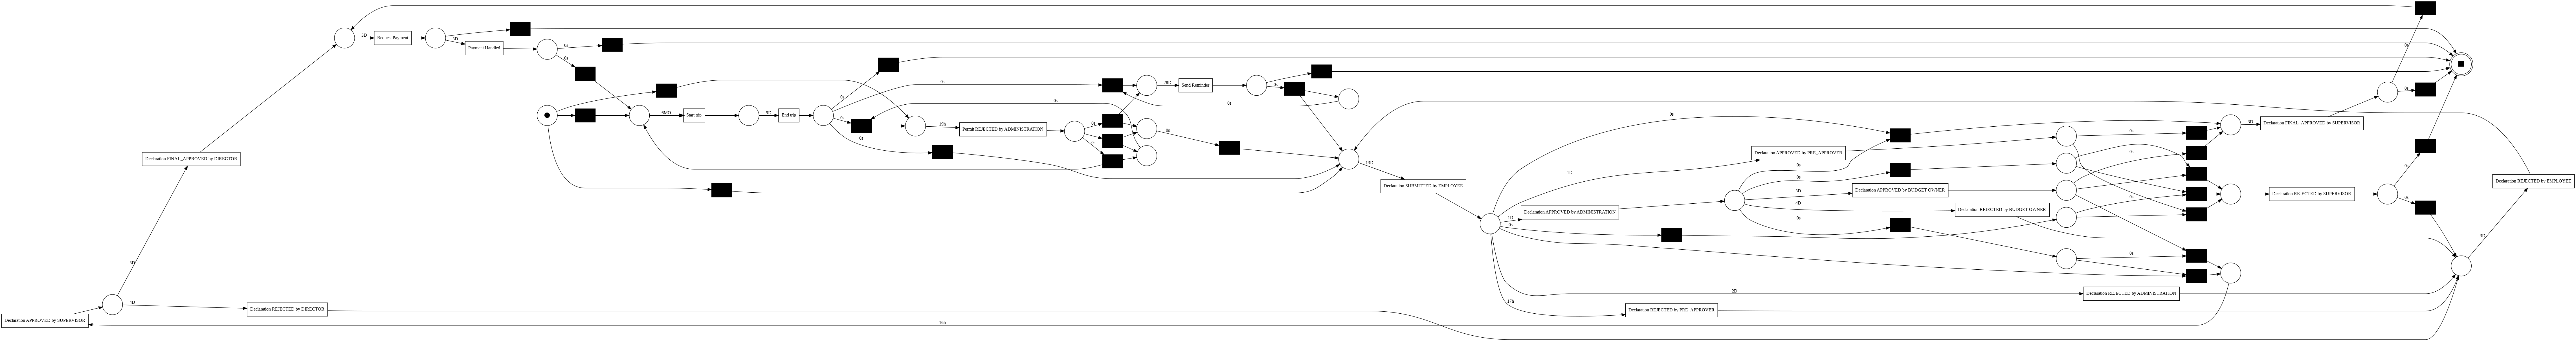

In [182]:
gviz = pn_visualizer.apply(heu_dnet,heu_dim, hue_dfm, variant=pn_visualizer.Variants.PERFORMANCE, log=clean_international)
pn_visualizer.view(gviz)

In [183]:
# nonfiltered = top_international = pm4py.filter_variants_top_k(international_log, 30, activity_key='concept:name', timestamp_key='time:timestamp', case_id_key='case:concept:name')

In [184]:
# international_freq_dfg, inter_freq_s, inter_freq_e = pm4py.discover_dfg(nonfiltered)
# pm4py.view_dfg(international_freq_dfg, inter_freq_s, inter_freq_e)

In [185]:
# international_perf_dfg, inter_perf_s, inter_perf_e = pm4py.discover_performance_dfg(nonfiltered)
# pm4py.view_performance_dfg(international_perf_dfg, inter_perf_s, inter_perf_e, aggregation_measure="mean")

# Findings


For simplicity, we filtered and simplified the DFG to make it easier to find the bottleneck. For us, a bottleneck is a mixture of frequent and longer mean time event.

In [198]:
percentage = .01
simple_domestic_variants = pm4py.filter_variants_by_coverage_percentage(clean_domestic, percentage)

<ipython-input-199-e97e104d6604>:1: DeprecatedWarning: discover_dfg is deprecated as of 2.3.0 and will be removed in 2.4.0. this method will be replaced by the discover_dfg_typed function(). Please adapt your code to use pm4py.discover_dfg_typed()
  domestic_dfg, dom_s, dom_e = pm4py.discover_dfg(simple_domestic_variants)
/usr/local/lib/python3.8/dist-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


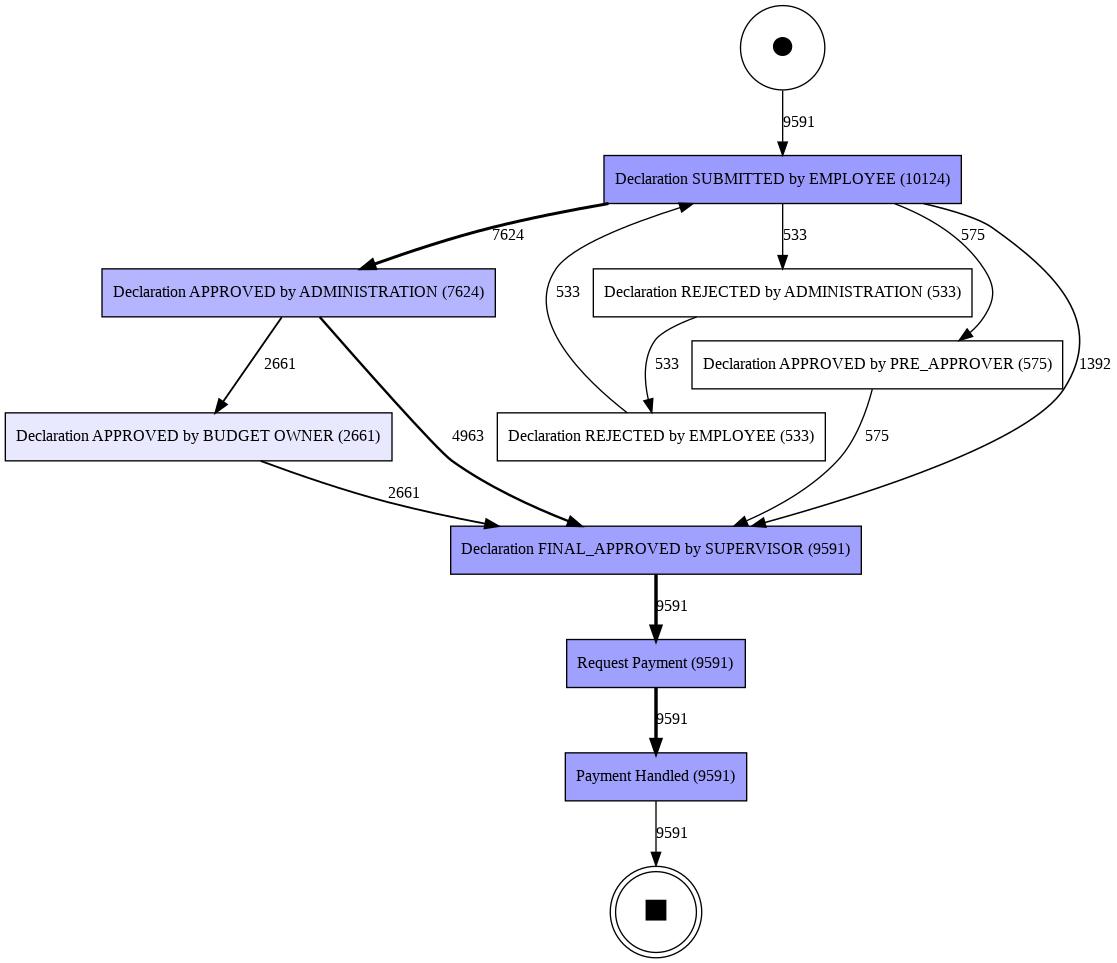

In [199]:
domestic_dfg, dom_s, dom_e = pm4py.discover_dfg(simple_domestic_variants)
pm4py.view_dfg(domestic_dfg, dom_s, dom_e)

/usr/local/lib/python3.8/dist-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


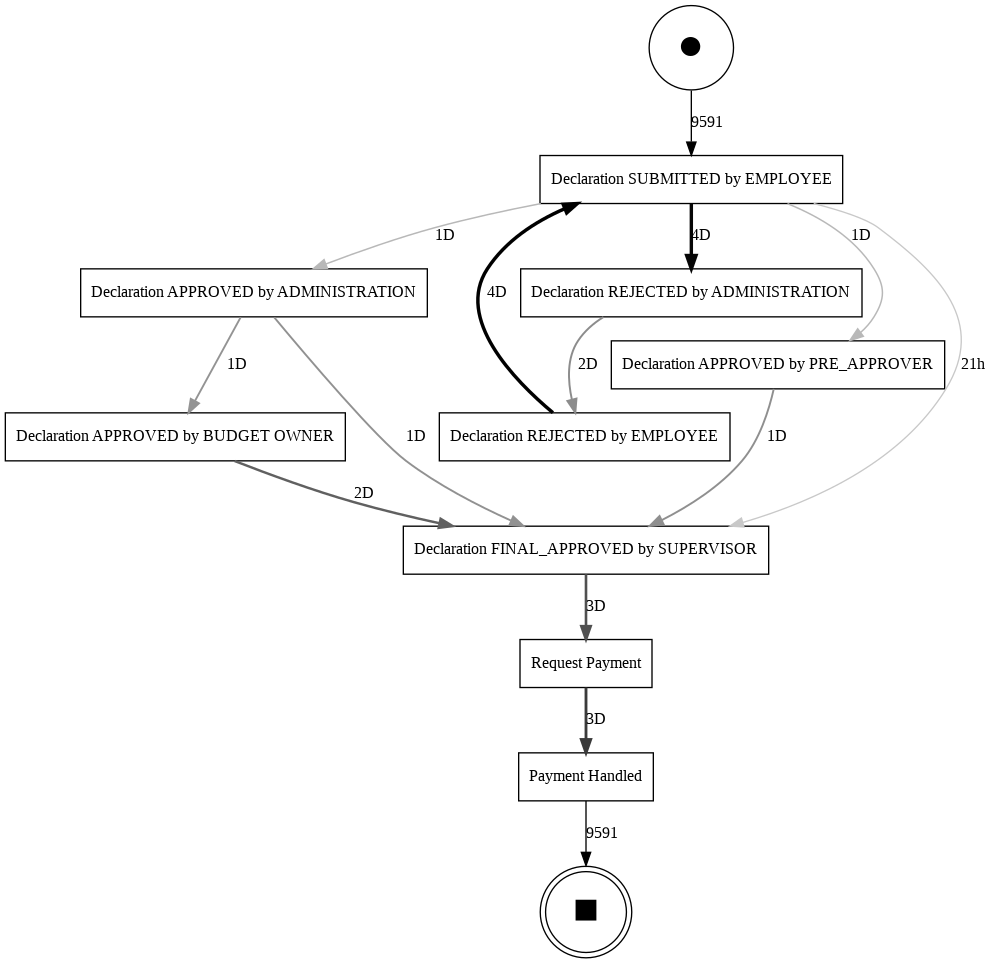

In [200]:
domestic_performance_dfg, dom_s, dom_e = pm4py.discover_performance_dfg(simple_domestic_variants)
pm4py.view_performance_dfg(domestic_performance_dfg, dom_s, dom_e, aggregation_measure="mean")

In [201]:
simple_international_variants = pm4py.filter_variants_by_coverage_percentage(clean_international, percentage)

<ipython-input-202-6c84ff02eb9d>:1: DeprecatedWarning: discover_dfg is deprecated as of 2.3.0 and will be removed in 2.4.0. this method will be replaced by the discover_dfg_typed function(). Please adapt your code to use pm4py.discover_dfg_typed()
  international_dfg, int_s, int_e = pm4py.discover_dfg(simple_international_variants)
/usr/local/lib/python3.8/dist-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


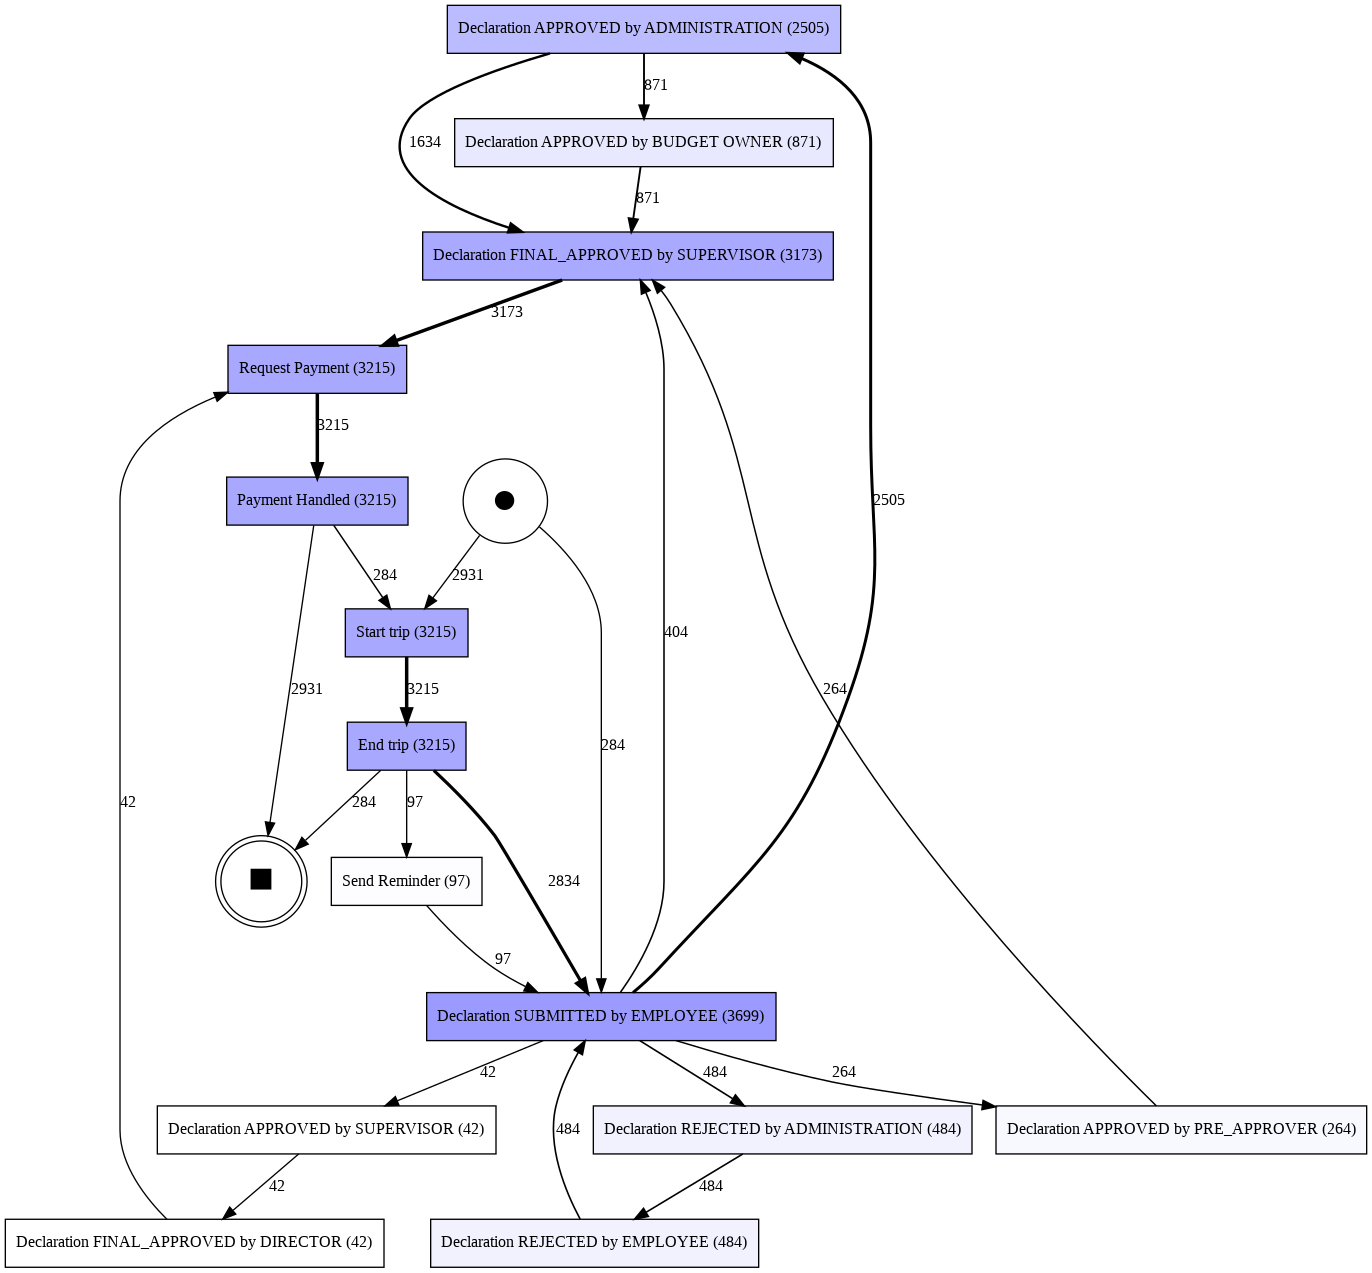

In [202]:
international_dfg, int_s, int_e = pm4py.discover_dfg(simple_international_variants)
pm4py.view_dfg(international_dfg, int_s, int_e)

/usr/local/lib/python3.8/dist-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


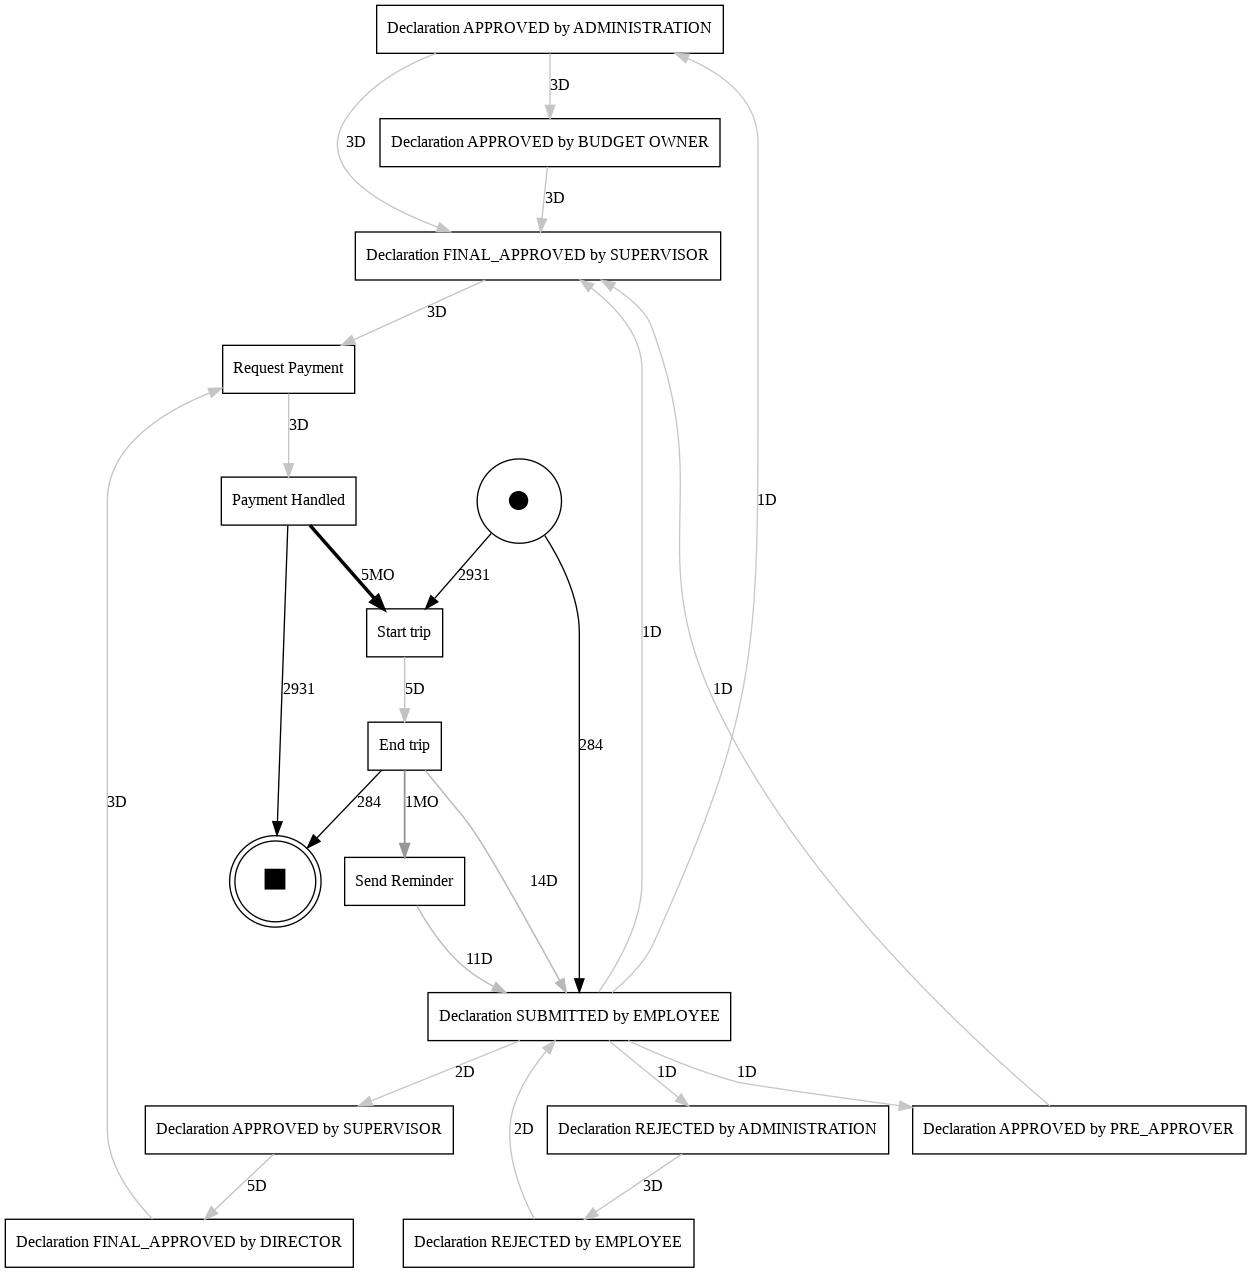

In [203]:
domestic_performance_dfg, dom_s, dom_e = pm4py.discover_performance_dfg(simple_international_variants)
pm4py.view_performance_dfg(domestic_performance_dfg, dom_s, dom_e, aggregation_measure="mean")

The biggest bottleneck is the supervisor activities for both International and Domestic declarations. For the supervisor to do the final approval and request payment, it takes on average 4-5 days.



---



**Drawbacks:**

PM4PY does not allow us to customize the performance graph output, instead, it rounds up the time to days instead of leaving it in an hour format. Also, PM4PY does not have a method of superimposing the frequency and performance.


# Collect Edges for Analysis

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Hardy -- collect_edges() collect all edges from <fromEvent> to <toEvent>

def collect_edges(df, fromEvent, toEvent, verbose=True):
  fromEvents = df[df['concept:name'] == fromEvent][['time:timestamp', 'id', 'case:id']]
  toEvents = df[df['concept:name'] == toEvent][['time:timestamp', 'id', 'case:id']]
  fromEvents.columns = ['from_event_timestamp', 'from_event_id', 'case:id']
  toEvents.columns = ['to_event_timestamp', 'to_event_id', 'case:id']
  from_event_count = fromEvents.shape[0]
  to_event_count = toEvents.shape[0]
  fromEvents.drop_duplicates(subset=['case:id'], keep=False, inplace=True)
  toEvents.drop_duplicates(subset=['case:id'], keep=False, inplace=True)
  from_event_no_duplicate_count = fromEvents.shape[0]
  to_event_no_duplicate_count = toEvents.shape[0]

  merged = pd.merge(fromEvents, toEvents, on='case:id')
  merged_count = merged.shape[0]

  merged['duration'] = (merged['to_event_timestamp'] - merged['from_event_timestamp'])
  merged['duration'] = merged['duration'] / np.timedelta64(86400, 's')  # measured in days
  merged = merged[merged['duration'] >= 0]  # from-event must happen before to-event
  merged = merged[['case:id', 'from_event_id', 'to_event_id', 'duration']]
  merged_count = merged.shape[0]
  if verbose:
      print(f"fromEvents: {from_event_count} ({from_event_no_duplicate_count} singles)")
      print(f"toEvents: {to_event_count} ({to_event_no_duplicate_count} singles)")
      print(f"merged: {merged_count}")

  return merged

fromEvents: 10570 (9058 singles)
toEvents: 7876 (7624 singles)
merged: 7091
count    7091.000000
mean        1.271568
std         8.727209
min         0.000012
25%         0.000069
50%         0.000602
75%         0.003137
max       282.582558
Name: duration, dtype: float64


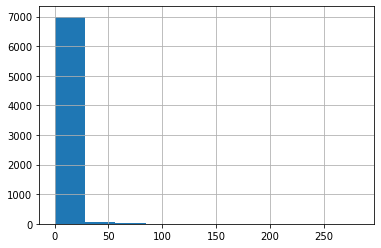

In [192]:
submitted_by_employee = 'Declaration SUBMITTED by EMPLOYEE'
approved_by_administration = 'Declaration APPROVED by ADMINISTRATION'
edges = collect_edges(top_domestic, submitted_by_employee, approved_by_administration, verbose=True)
print(edges['duration'].describe())
edges['duration'].hist()

## Inductive Petri Net

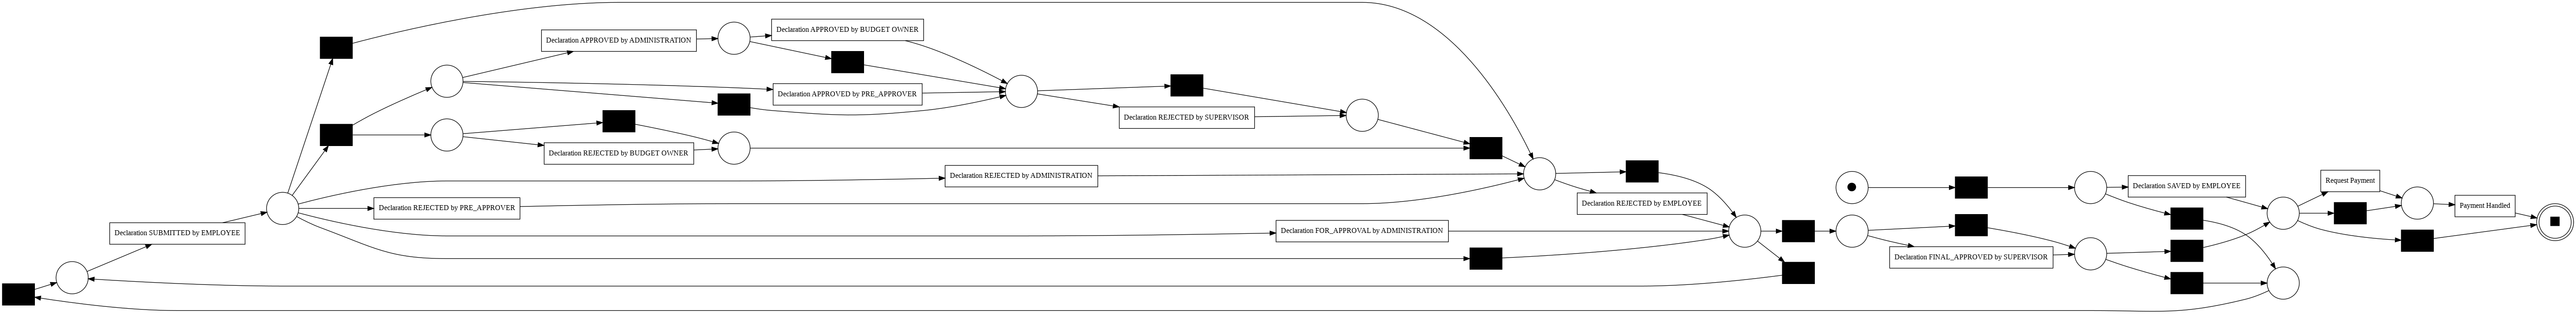

In [193]:
dom_net, dom_im, dom_fm = pm4py.discover_petri_net_inductive(clean_domestic, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(dom_net, dom_im, dom_fm, format='png')

## Heuristic Petri Net - Frequency and Performance Visualization

replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

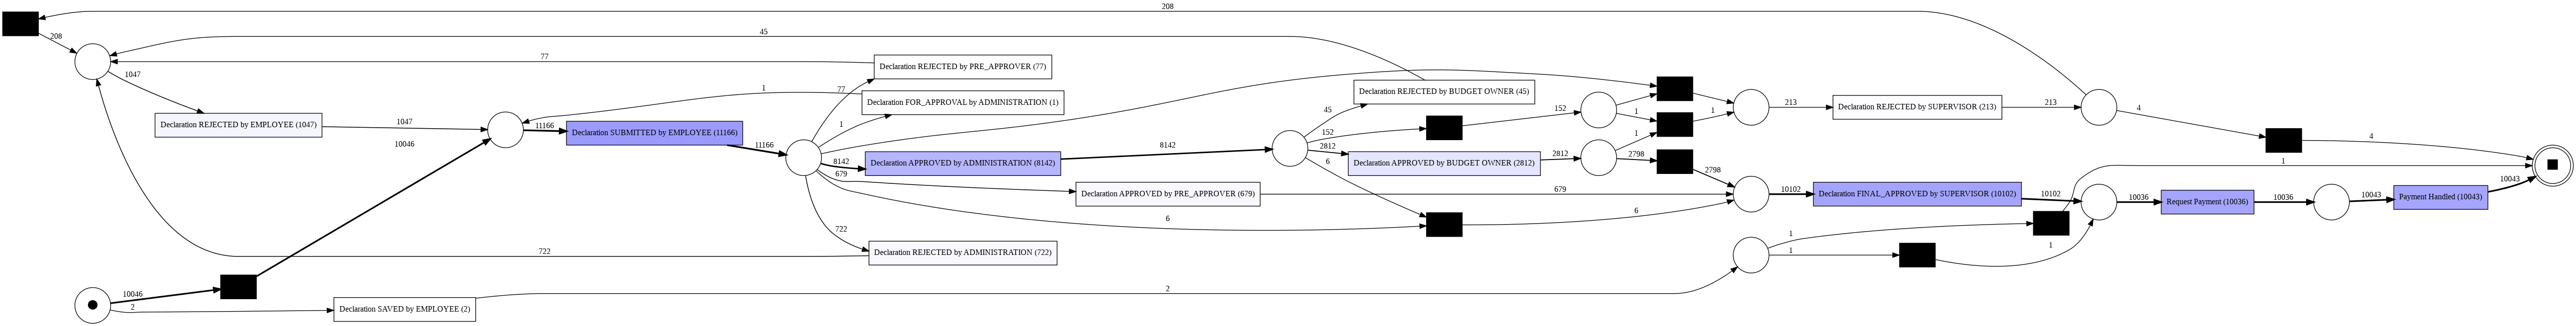

In [194]:
dnet,dim,dfm = pm4py.discover_petri_net_heuristics(clean_domestic, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
gviz = pn_visualizer.apply(dnet,dim,dfm, variant=pn_visualizer.Variants.FREQUENCY, log=clean_domestic)
pn_visualizer.view(gviz)

replaying log with TBR, completed variants ::   0%|          | 0/68 [00:00<?, ?it/s]

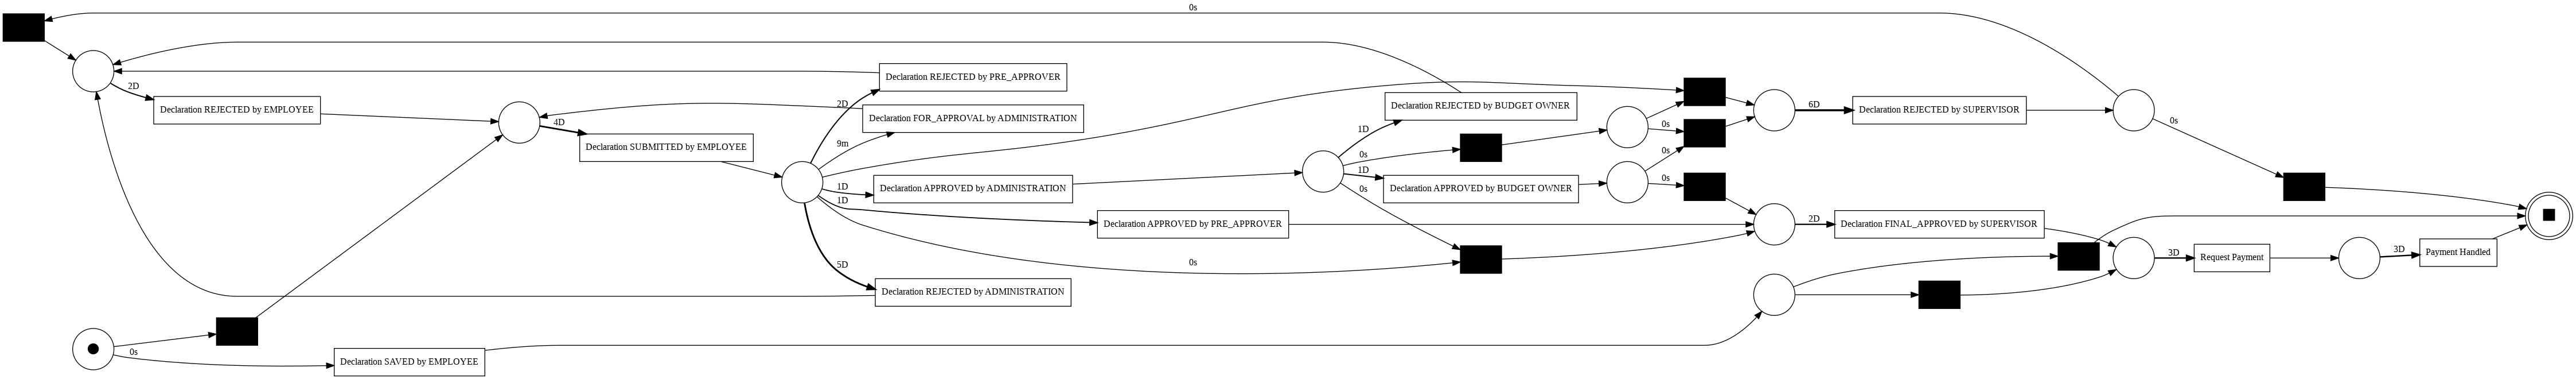

In [195]:
gviz = pn_visualizer.apply(dnet,dim,dfm, variant=pn_visualizer.Variants.PERFORMANCE, log=clean_domestic)
pn_visualizer.view(gviz)